## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor)
from xgboost import XGBRegressor

from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error)
from sklearn.model_selection import GridSearchCV, train_test_split
import pickle

import warnings
warnings.filterwarnings('ignore')

## Load the data set

In [4]:
car_data = pd.read_csv('car_prices.csv')

In [5]:
car_data.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [6]:
car_data['highwaympg'].value_counts()

highwaympg
25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: count, dtype: int64

In [7]:
car_data.set_index('car_ID', inplace=True)
car_data.head(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [8]:
car_data['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [9]:
car_data['brand_name'] = car_data['CarName'].apply(lambda x : x.split()[0])

In [10]:
car_data.drop(columns='CarName', inplace=True)

In [11]:
car_data.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_name
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero


## Shape of data

In [13]:
print(f' Car data : rows {car_data.shape[0]}, columns {car_data.shape[1]}')

 Car data : rows 205, columns 25


In [14]:
car_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'brand_name'],
      dtype='object')

In [15]:
num_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
cat_cols =['brand_name', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 
            'cylindernumber', 'fuelsystem']

## Data Exploration

### Descriptive Statistics

In [18]:
car_data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


Inference : 

* Minimum mean is of symboling column that is 0.83, boreratio and stroke have almost similar mean that is 3.32 and 3.25, highest mean is of the price column that is 13276.71
* Lowest standard deviation is of boreratio column that is 0.27 and highest standard deviation is again of price column that is 7988.85
* Lowest median is of symboling column that is 1.00 and highest is of price column that is 10295.00

* Hence from the above information we can say that the descriptive statistics shows higher value of price in all sections and the reason might be that it is a target column

### Visualization

 * Analyzing the target (price) column

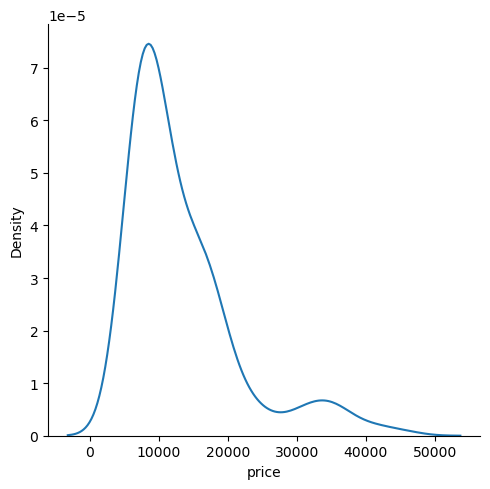

In [22]:
sns.displot(car_data['price'], kind='kde')
plt.show()

Inference : It is a right skewed data. Mostly cars are of price 30,000 or more

### Univariate Analysis

Displot and boxplot for all numerical columns

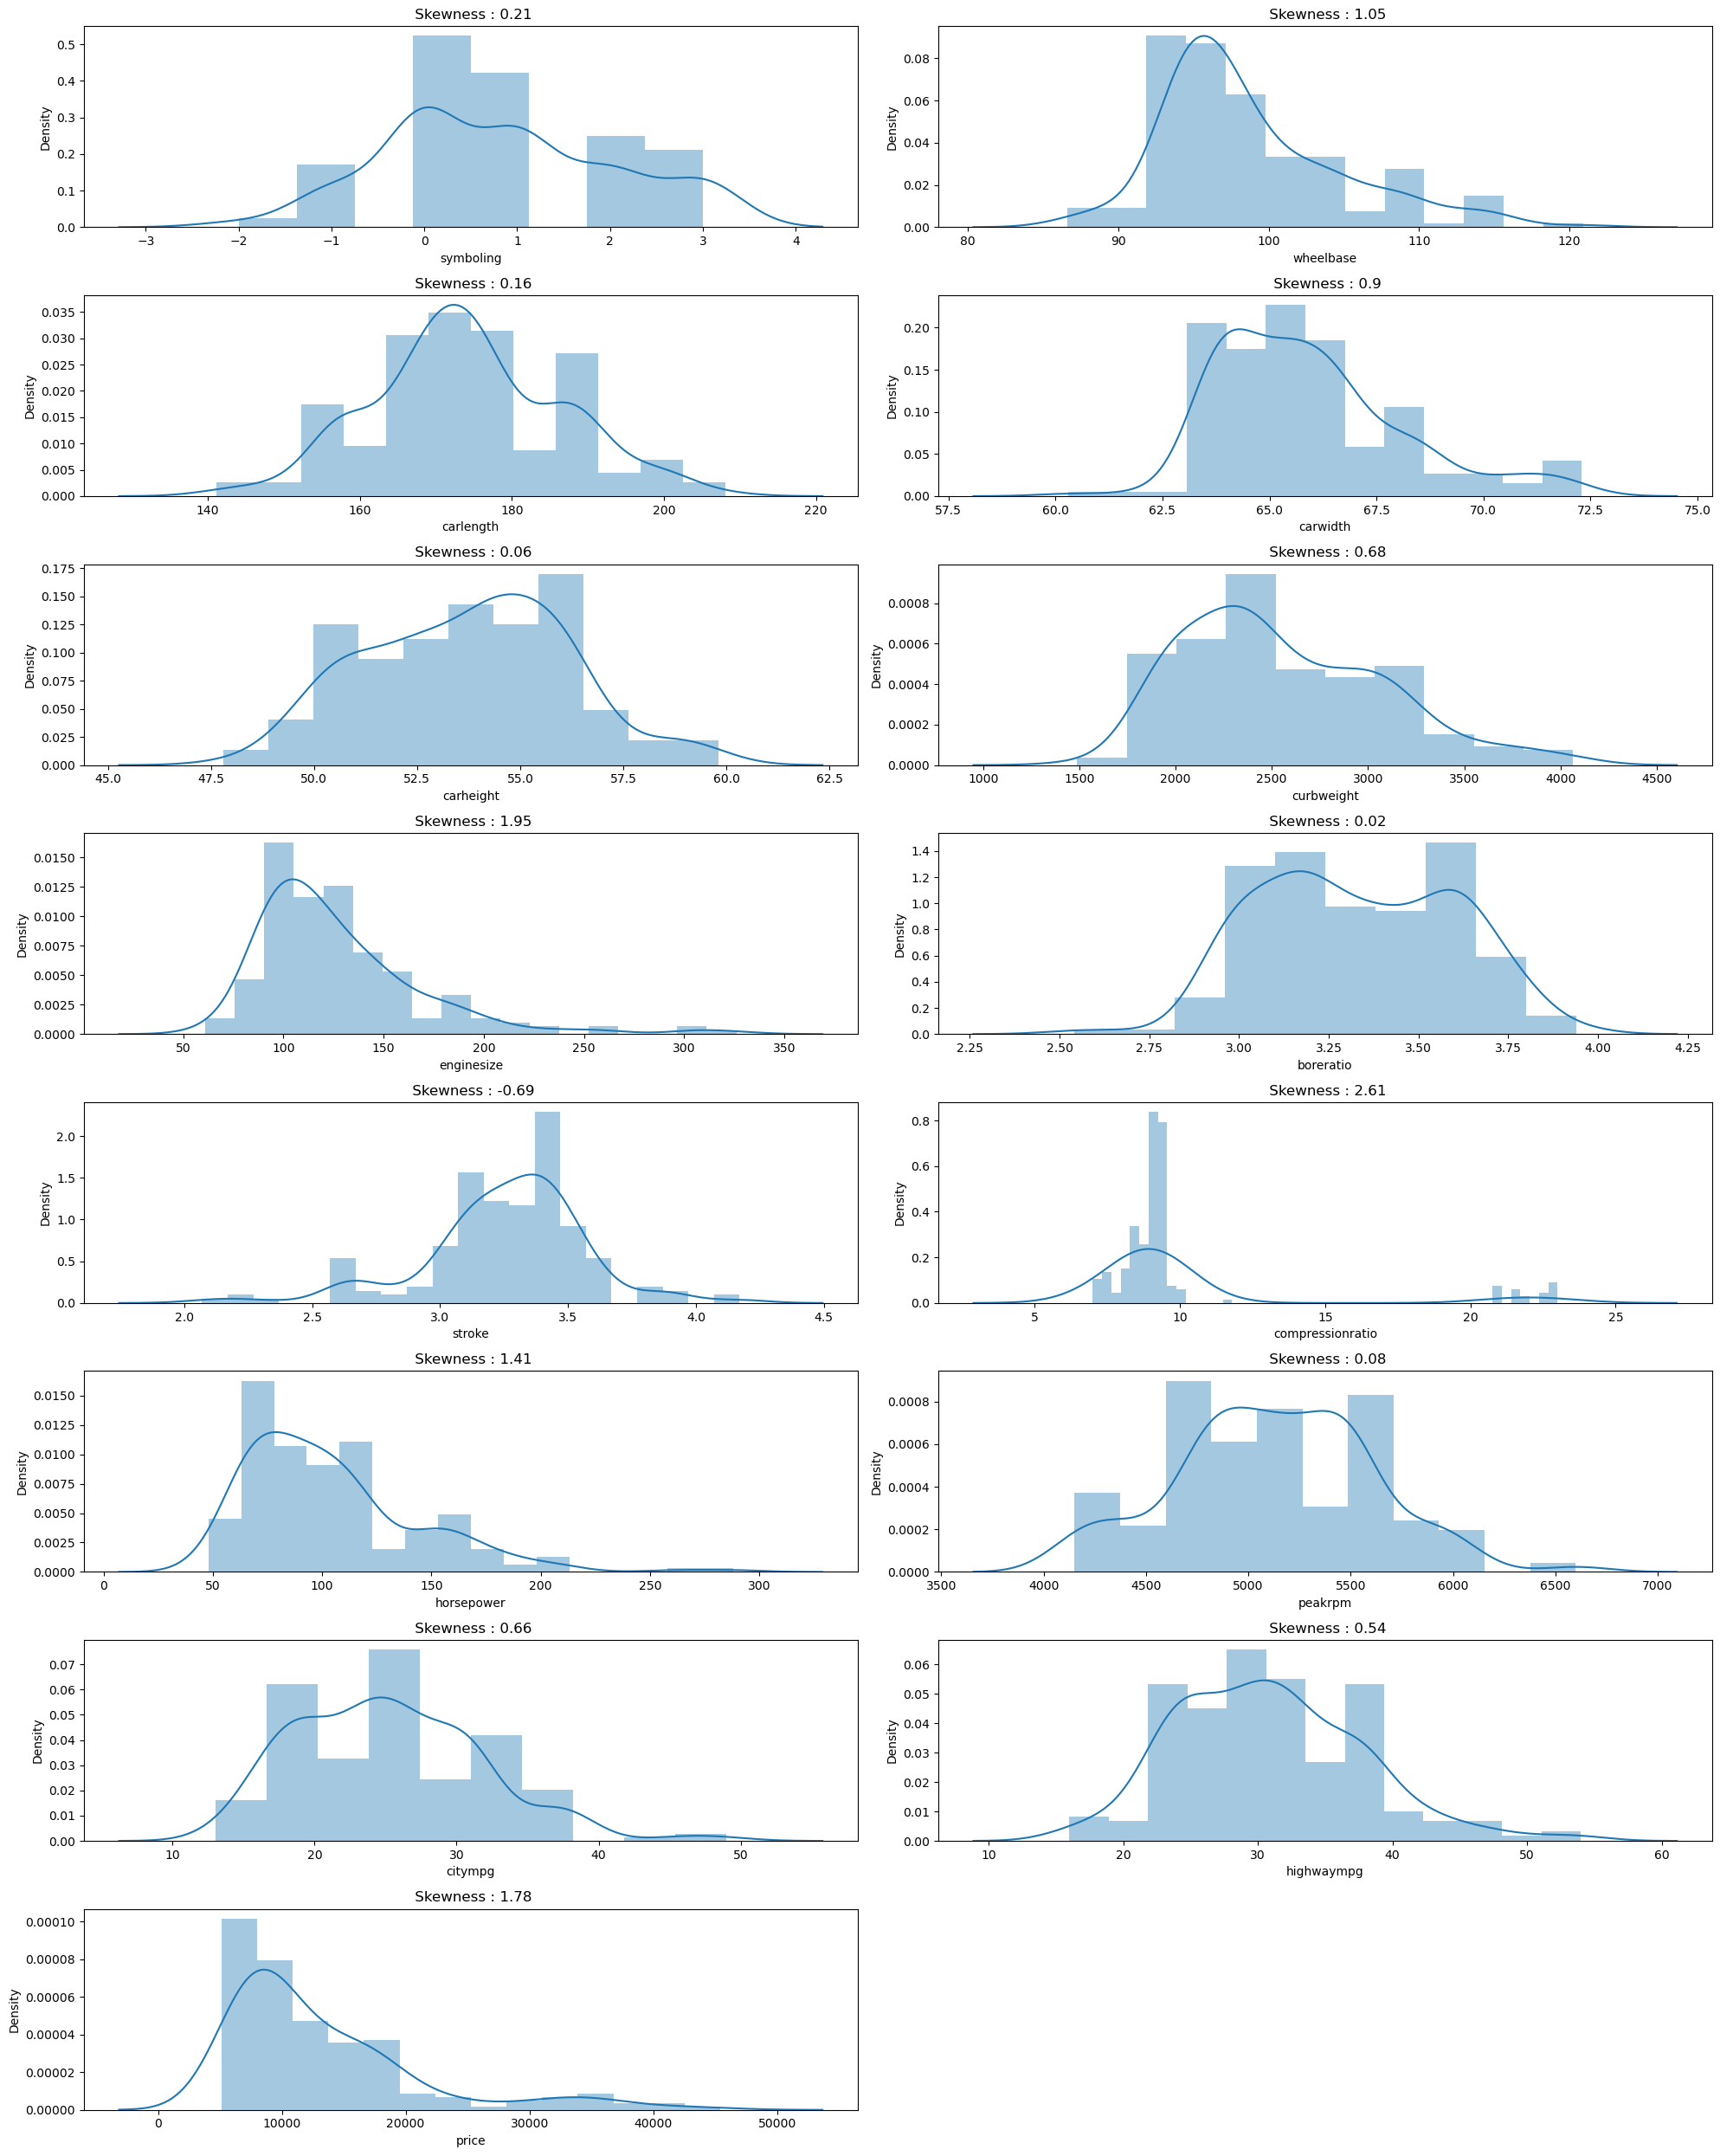

In [26]:
t = 1
plt.figure(figsize=[20,25])
for i in num_cols:
    plt.subplot(8,2,t)
    sns.distplot(car_data[i])
    plt.title(f' Skewness : {round(car_data[i].skew(),2)}')
    t= t+1
plt.tight_layout()
plt.show()

Inference : 

* Some of the columns such as symboling, carwidth, boreratio, stroke are left skewed
* Other columns such as wheelbase, enginesize, compressionratio, horsepower, peakrpm, citympg, highwaympg, price are right skewed
* Rest three columns are carlength, carheight and curbweight seems to be normally distributed

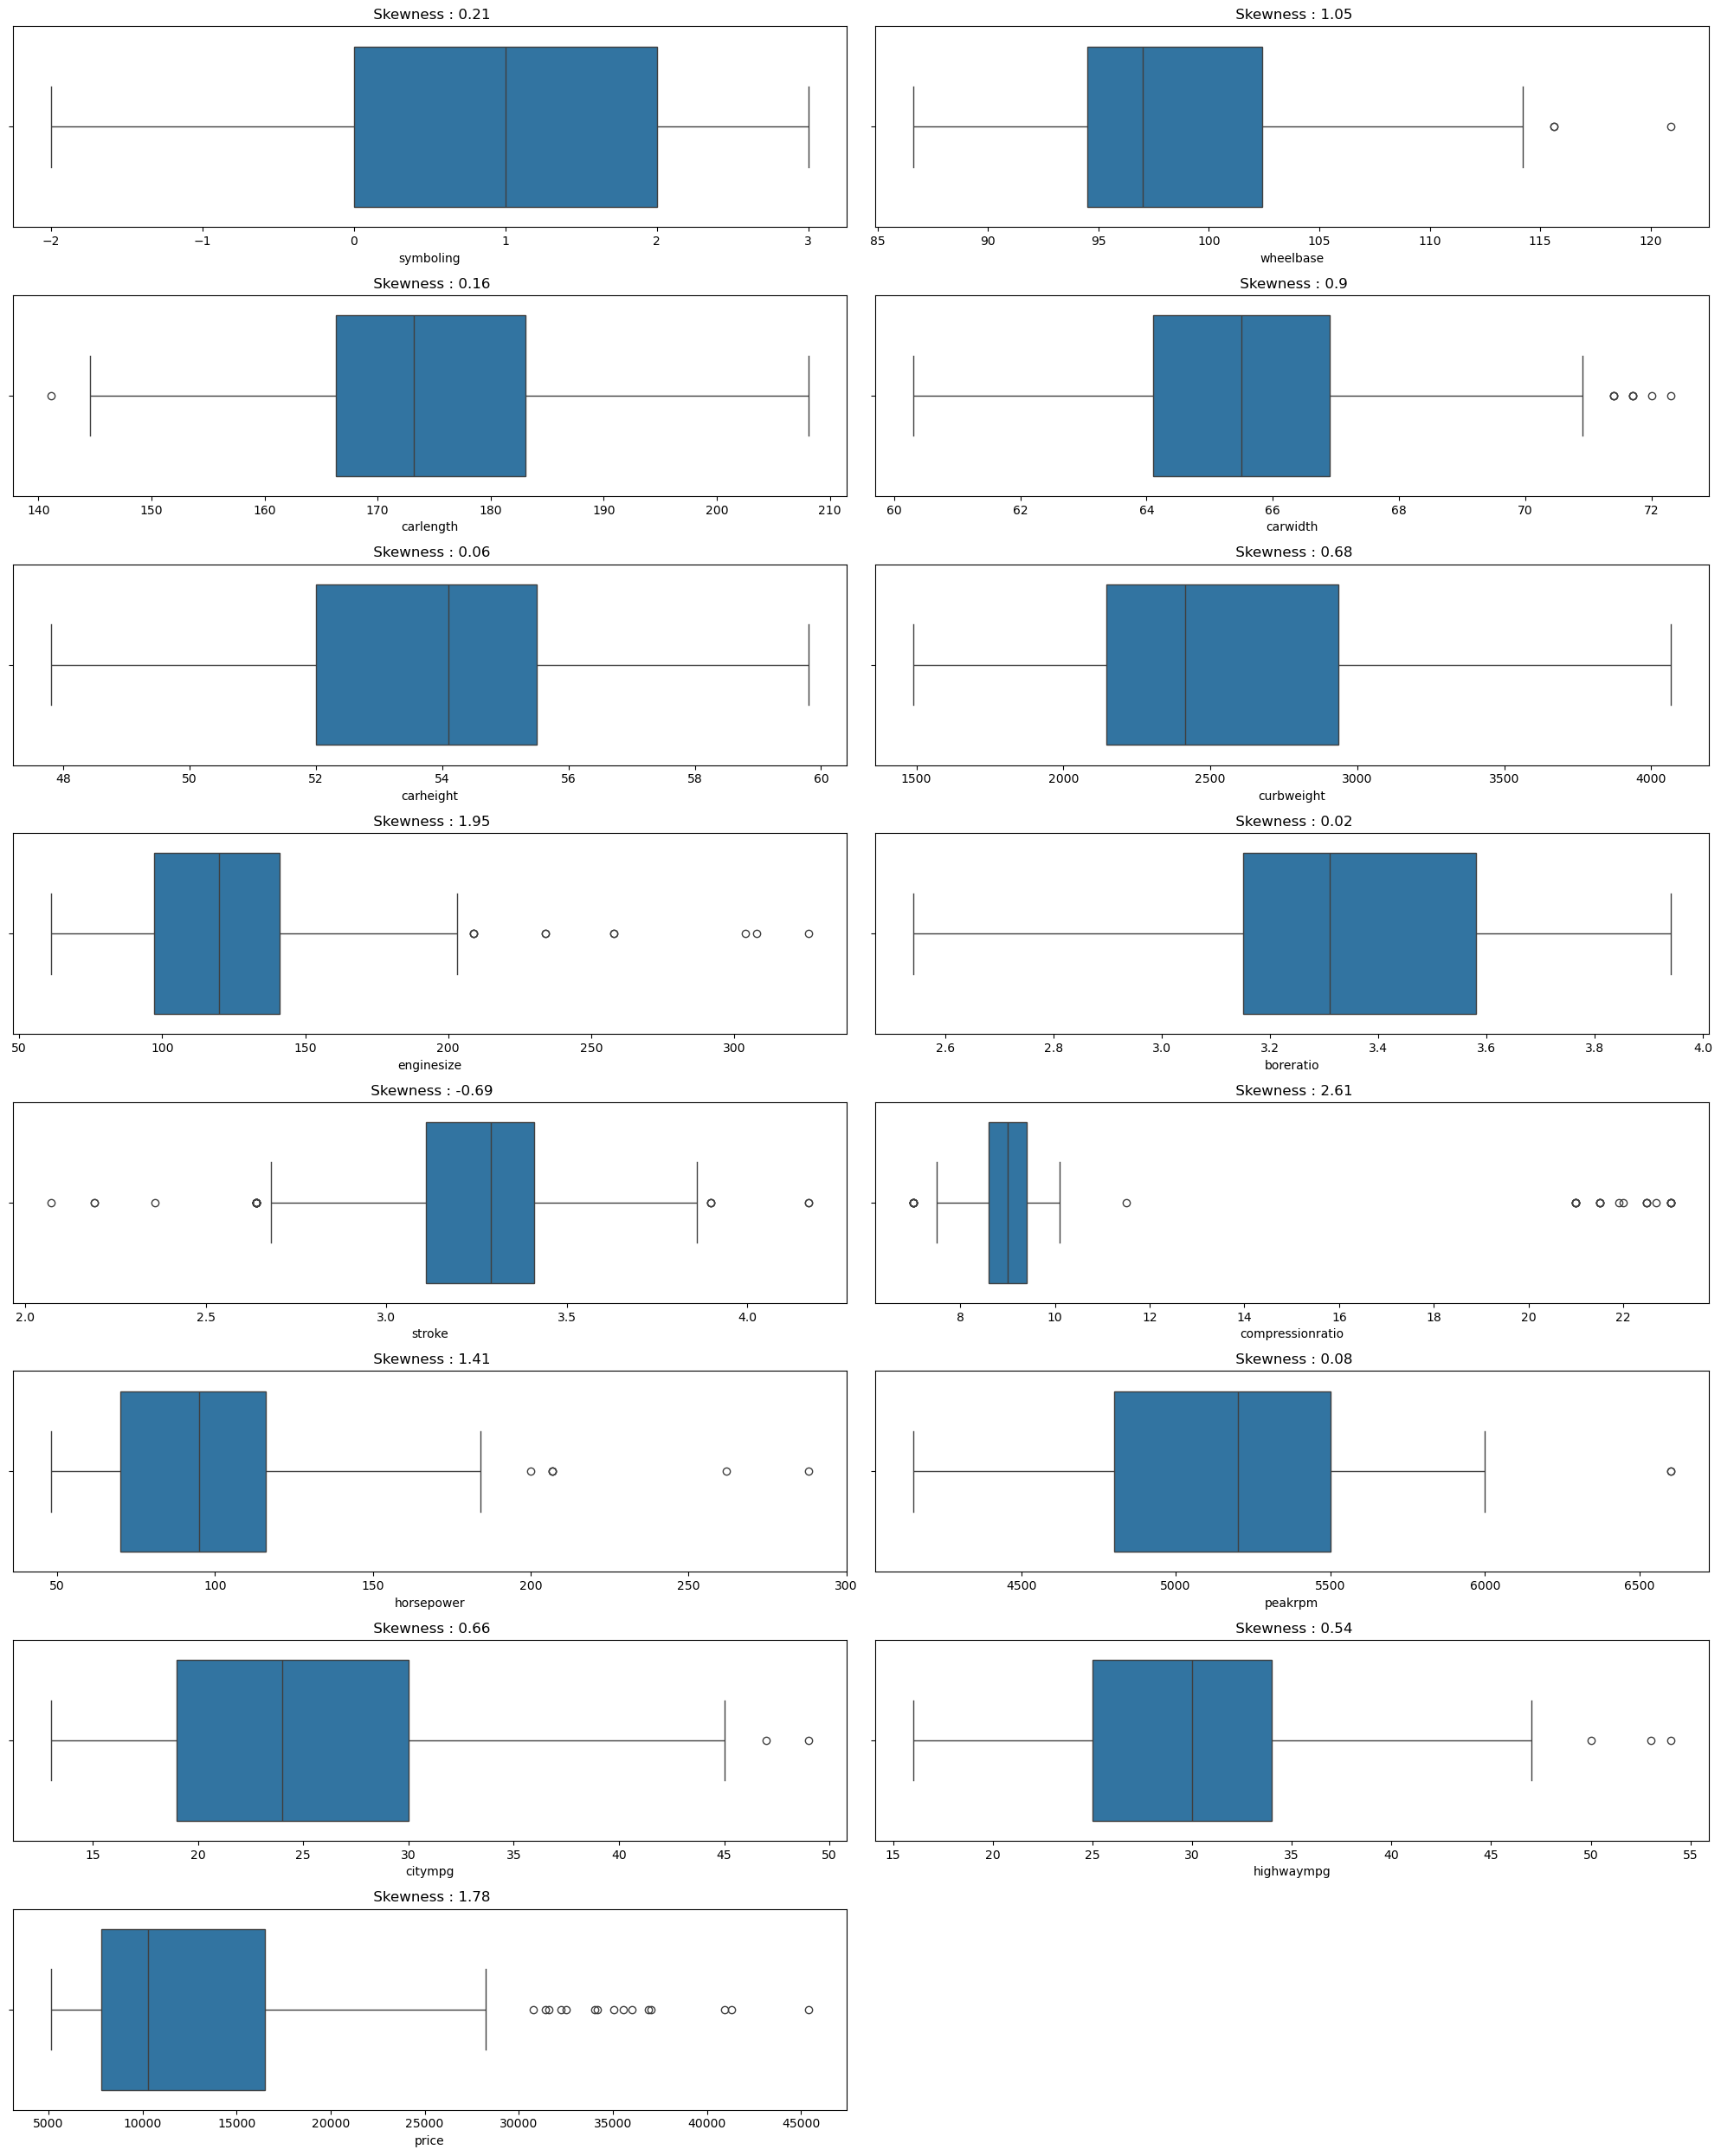

In [28]:
t = 1
plt.figure(figsize=[20,25])
for i in num_cols:
    plt.subplot(8,2,t)
    sns.boxplot(data=car_data, x=i)
    plt.title(f' Skewness : {round(car_data[i].skew(),2)}')
    t= t+1
plt.tight_layout()
plt.show()

Inference : 

* Carwidth has outliers whereas wheelbase, enginesize, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg and price columns have extreme outliers

Countplot for all categorical columns

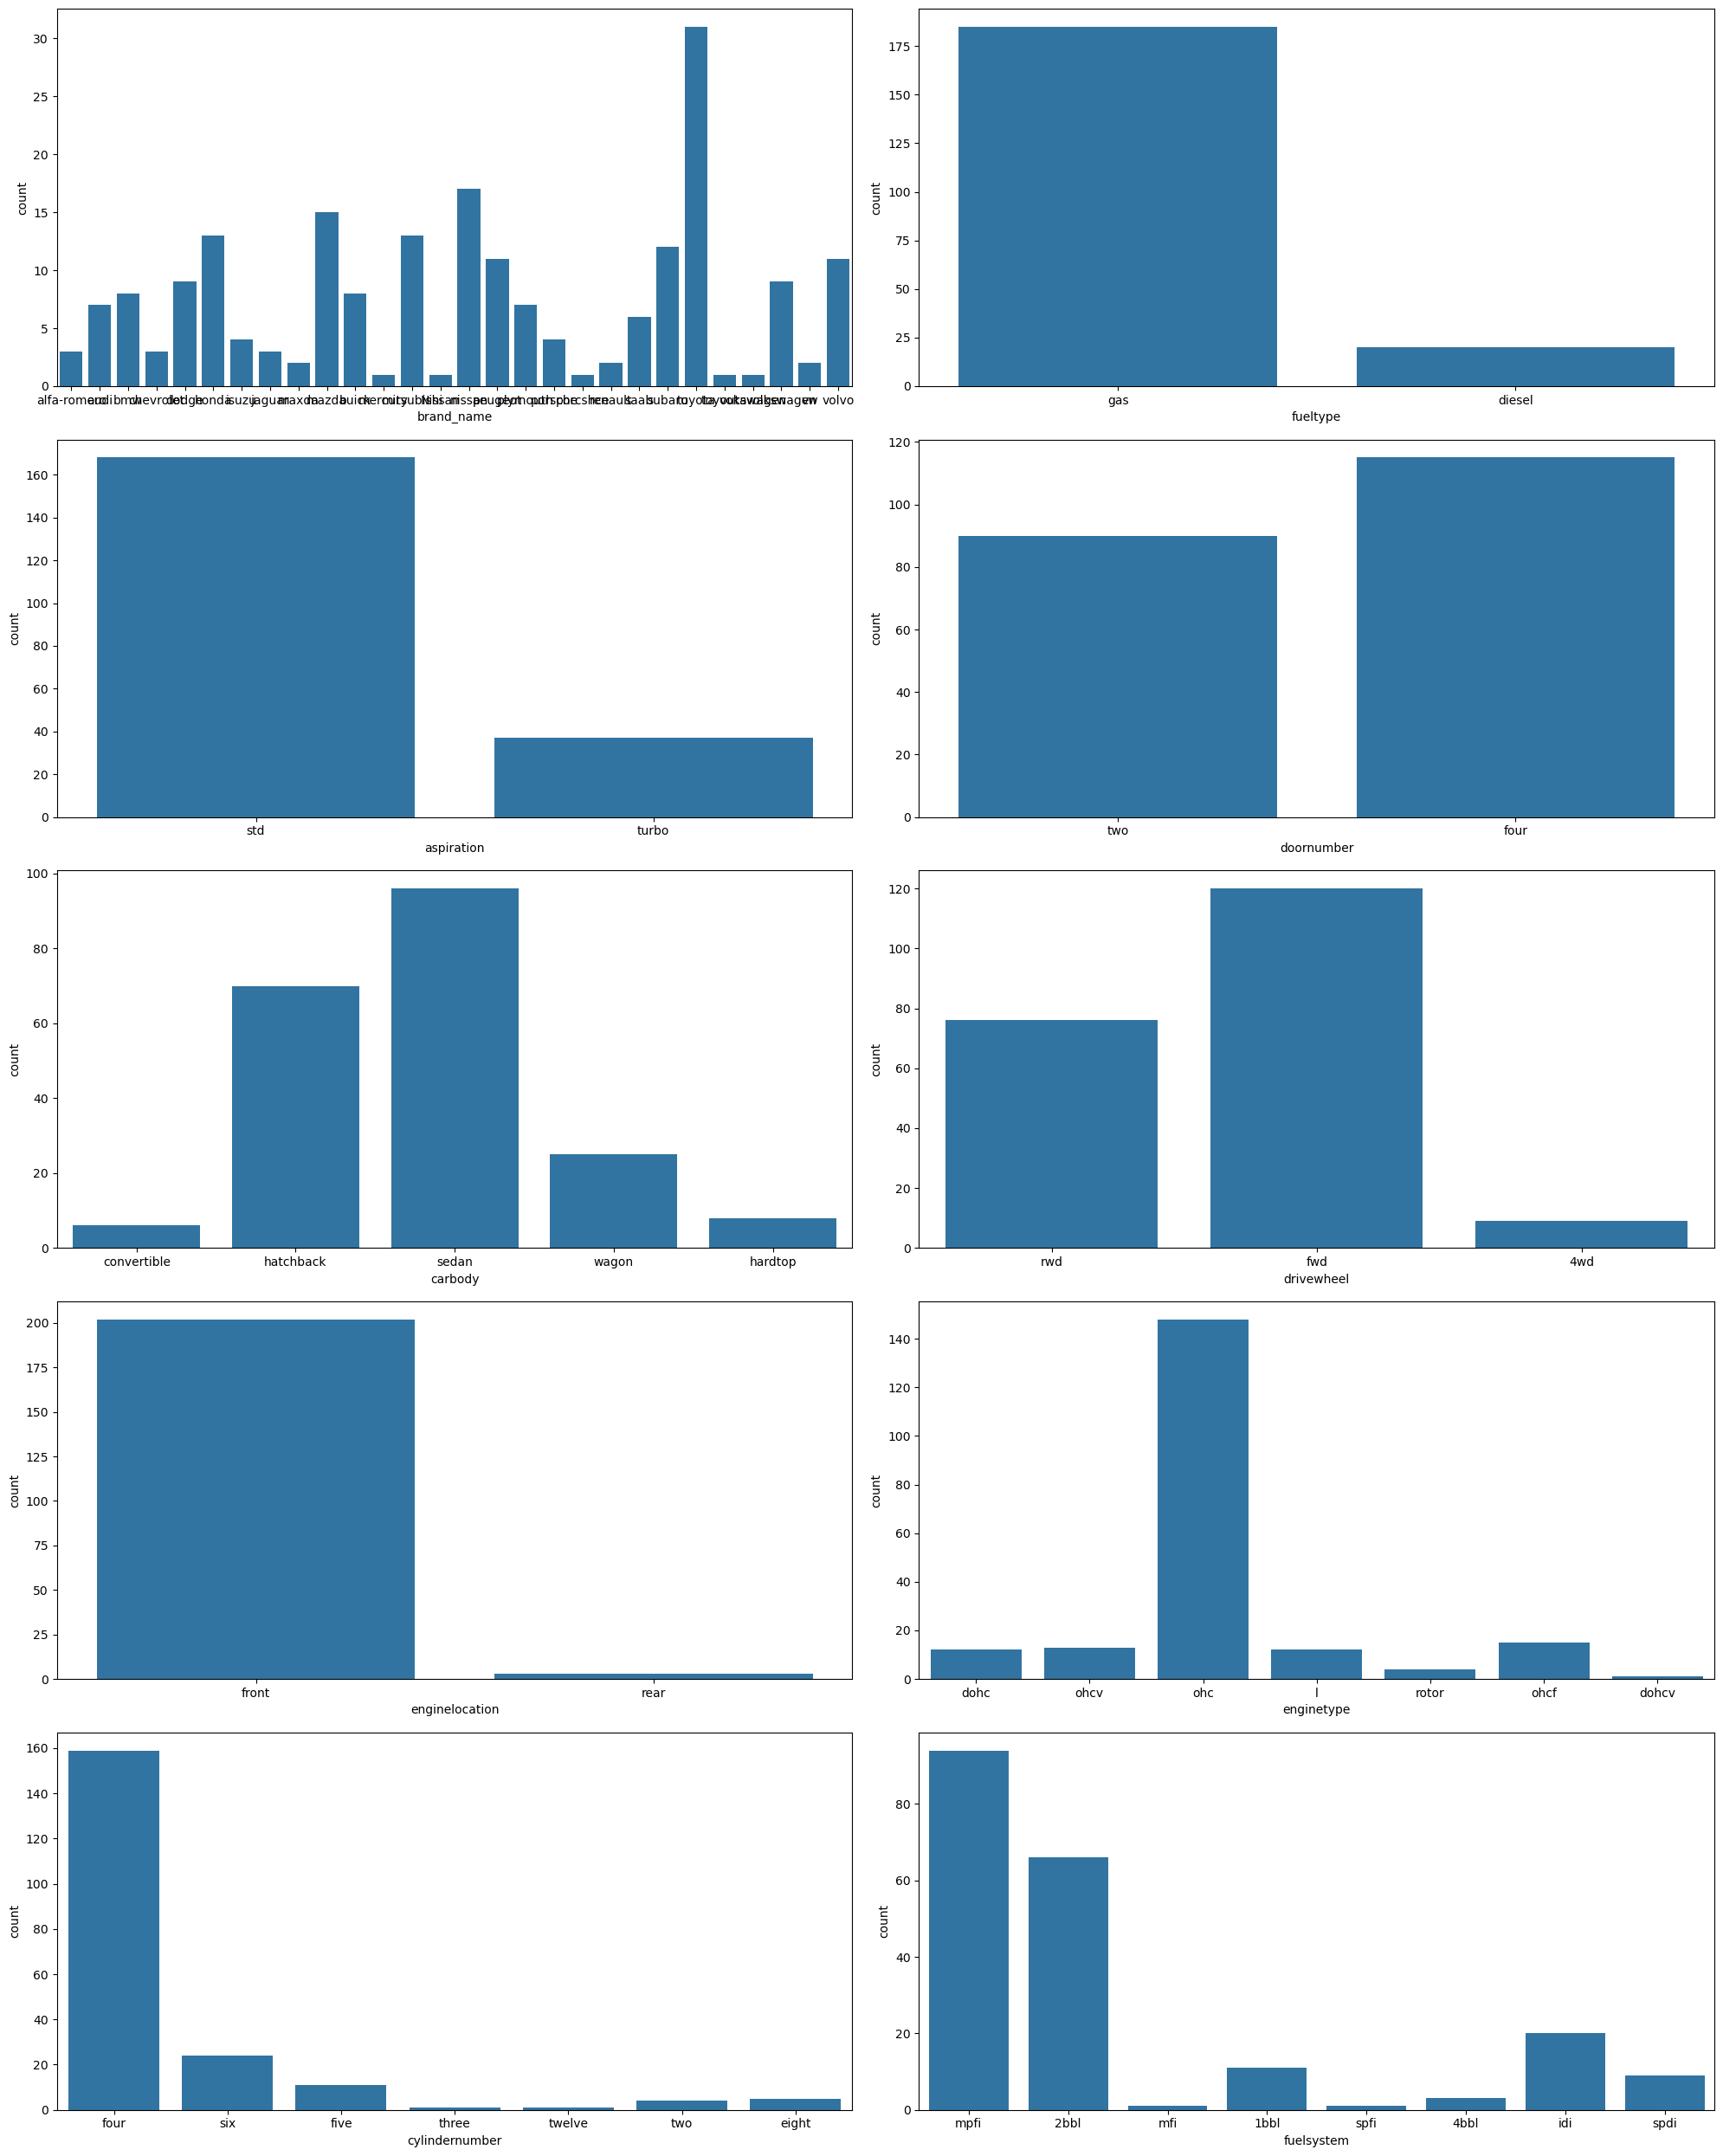

In [31]:
t=1
plt.figure(figsize=[20,25])
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(data=car_data, x=i)
    t=t+1
plt.tight_layout()
plt.show()

Inference : 

* Most of the car have gas fuel type 
* Mostly aspiration used in car is std
* Maximum cars have four doors
* Maximum car body is sedan and then hatchback
* Mostly drivewheel in cars are fwd and then rwd
* Maximum cars have front engine location and ohc engine type
* Mostly cars have four cylinders and mpfi fuel system

### Bivariate Analysis

For numeric vs numerical columns

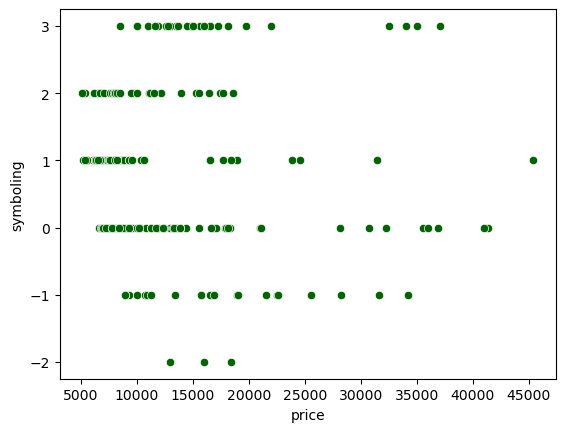

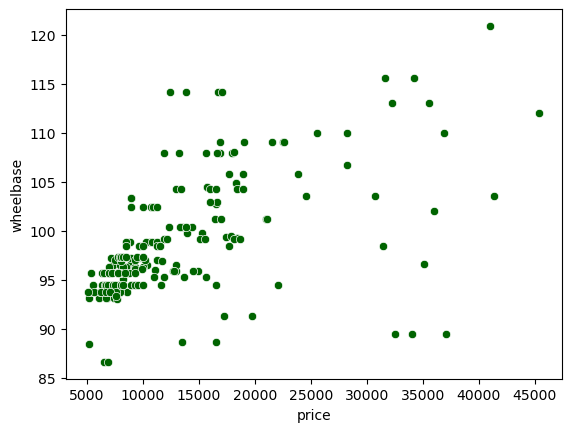

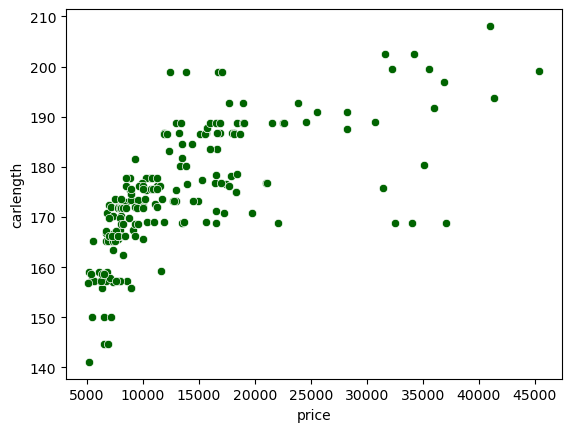

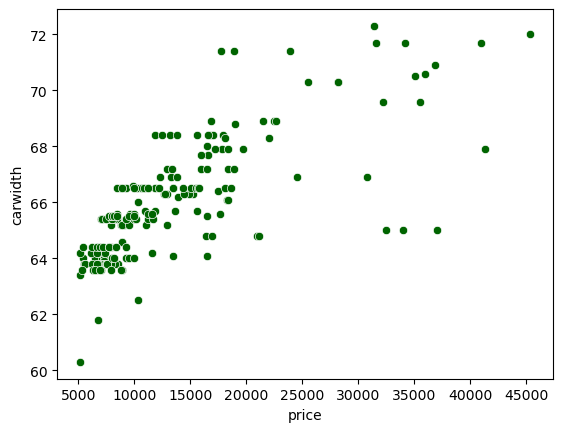

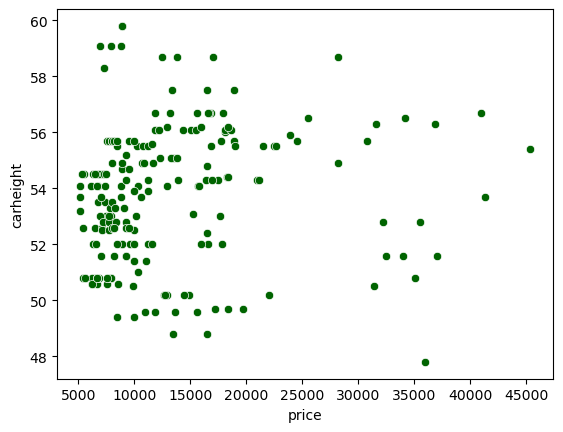

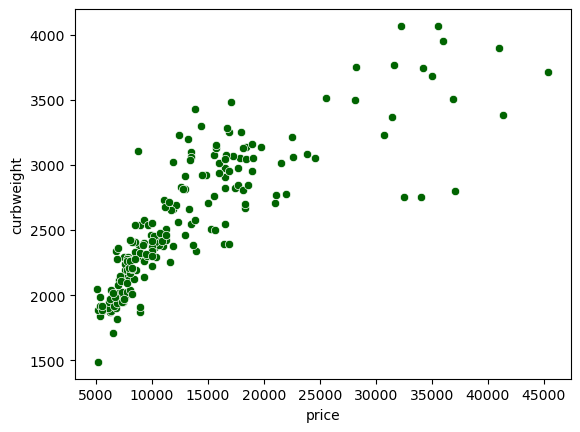

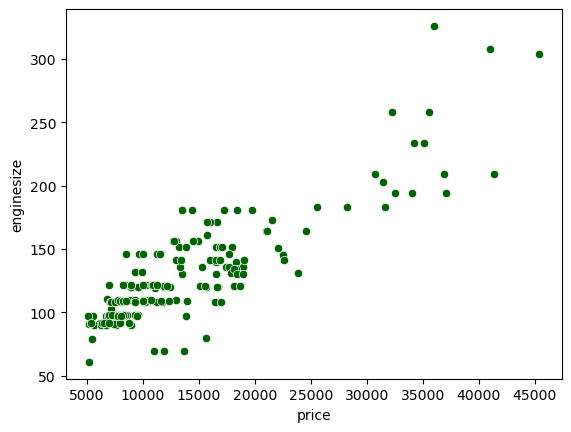

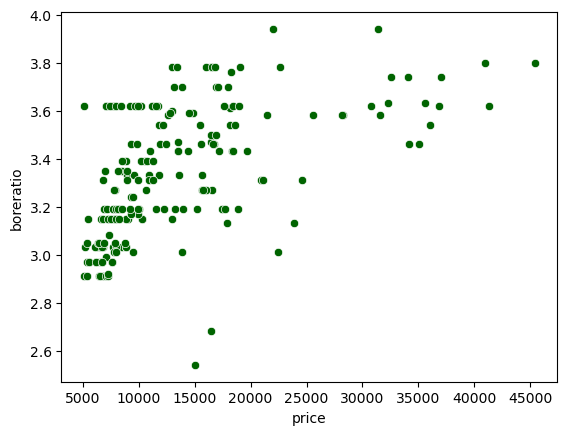

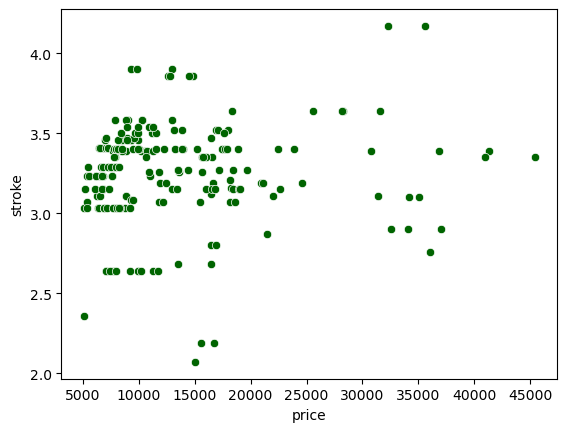

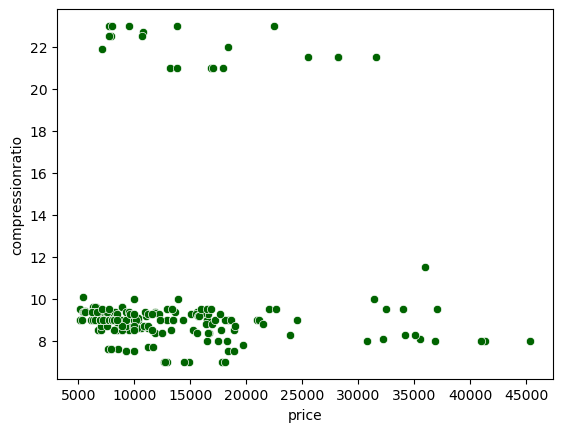

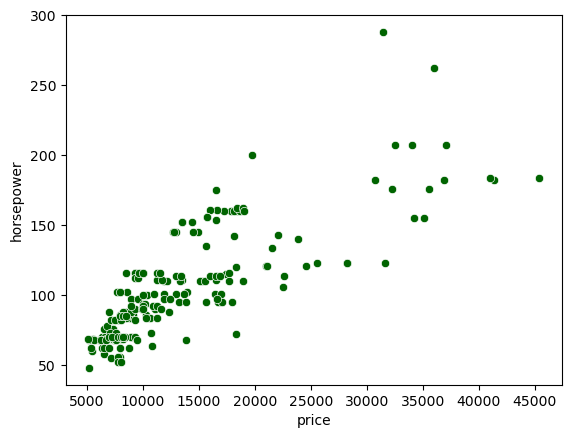

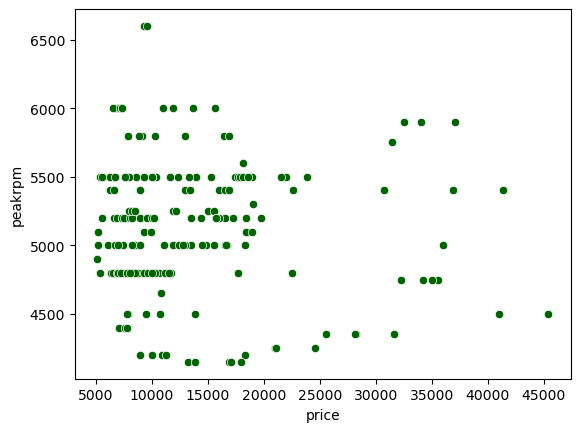

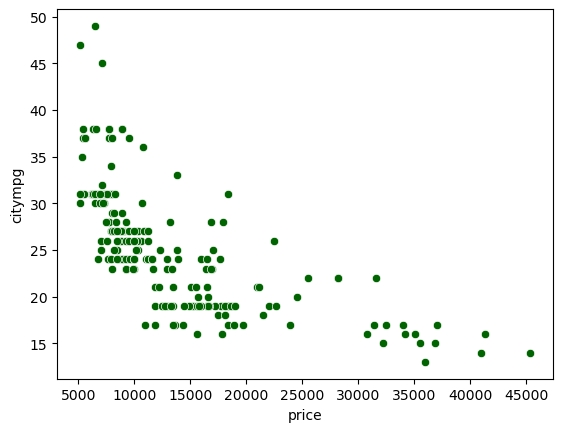

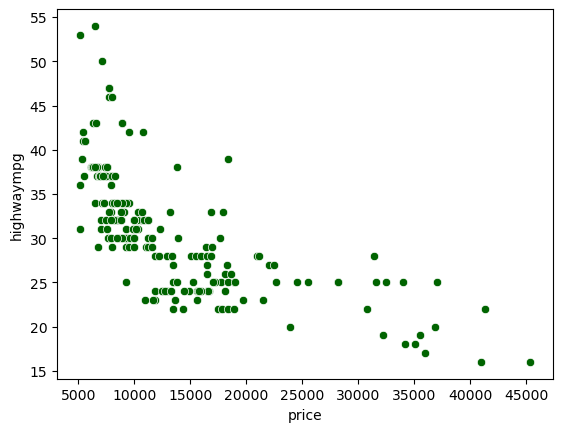

In [35]:
for i in num_cols:
    if i!='price':
        sns.scatterplot(data=car_data, x='price', y=i, color='darkgreen')
        plt.show()

For numeric vs categorical columns

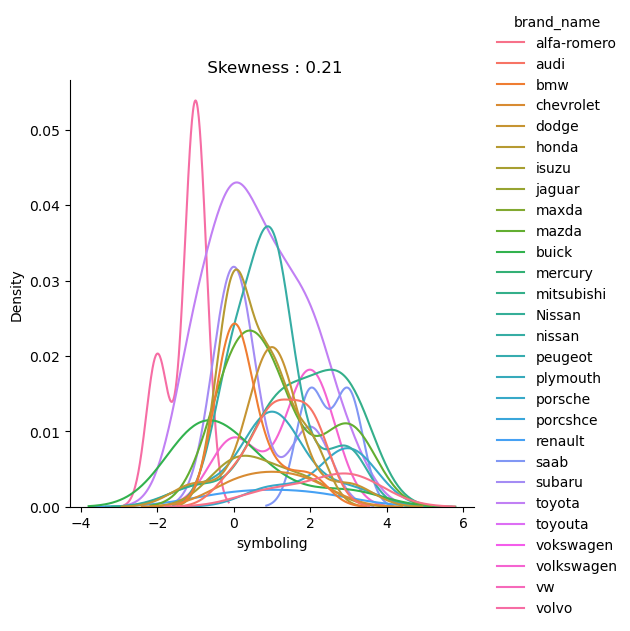

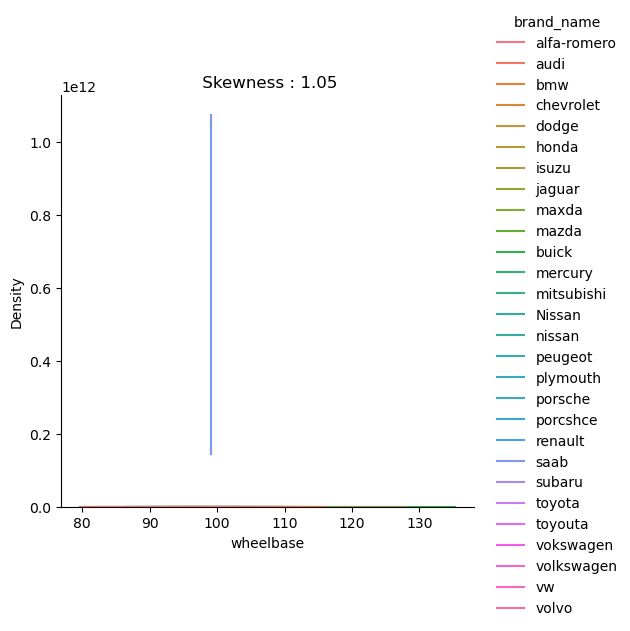

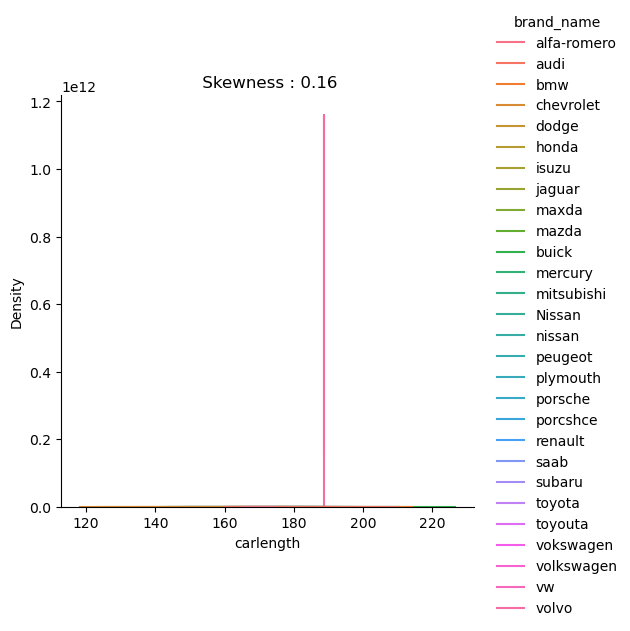

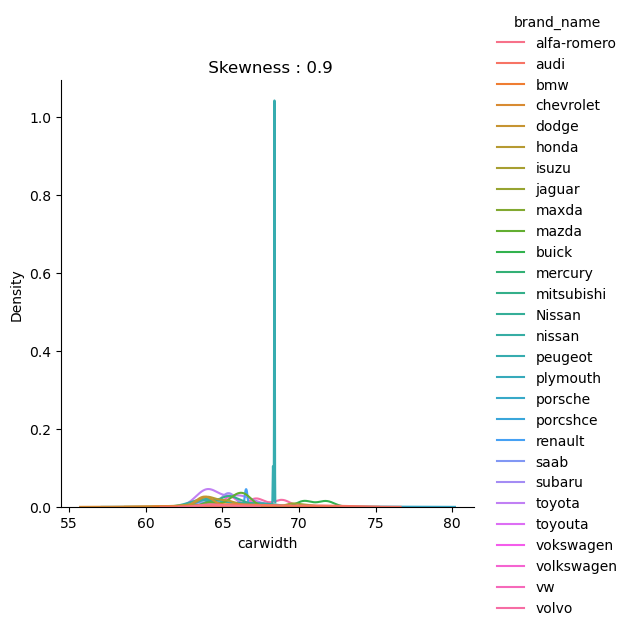

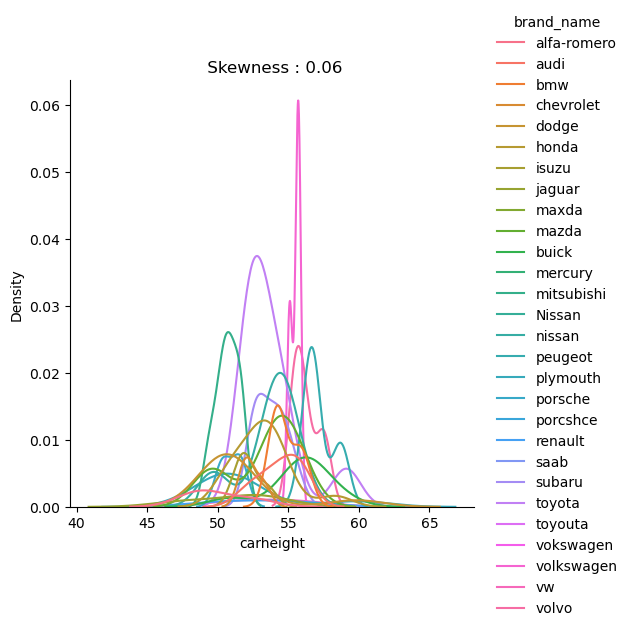

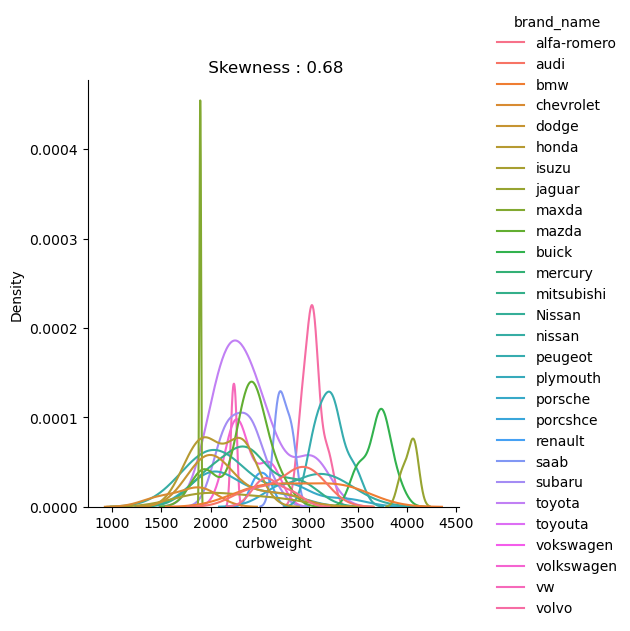

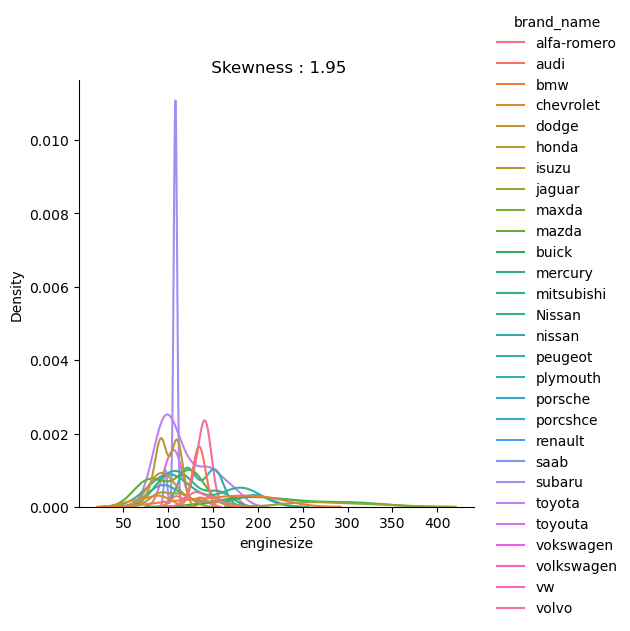

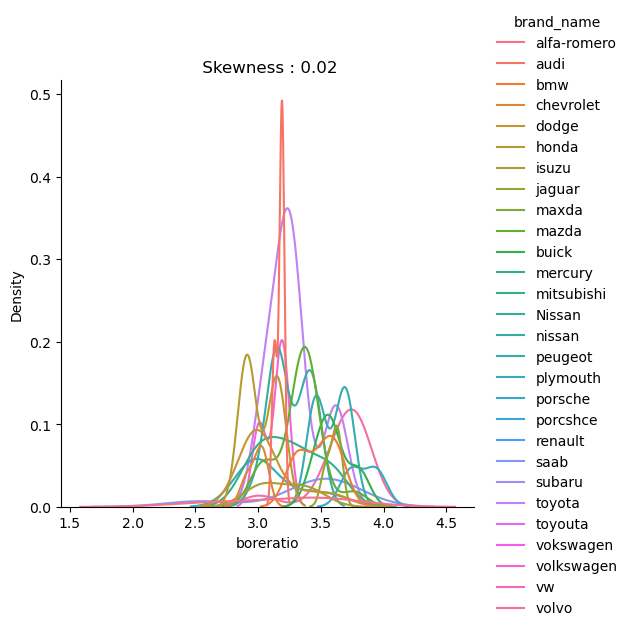

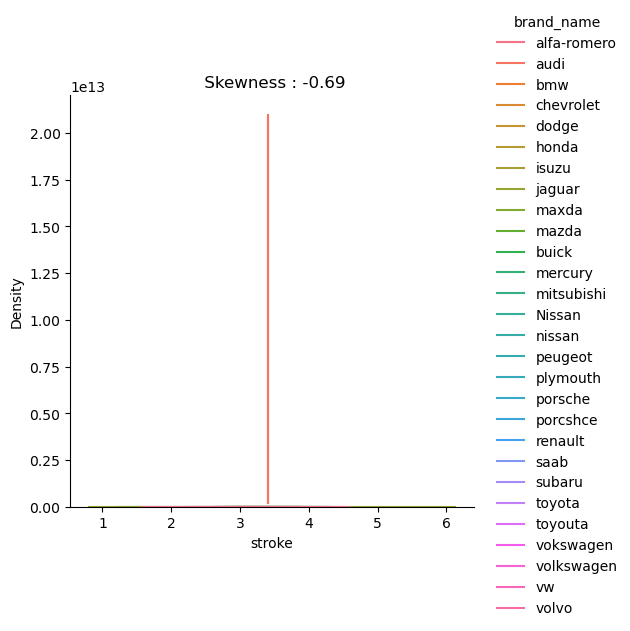

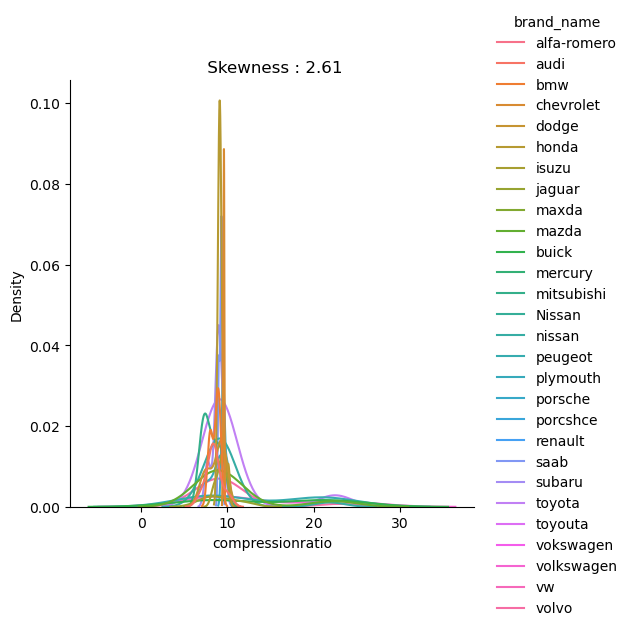

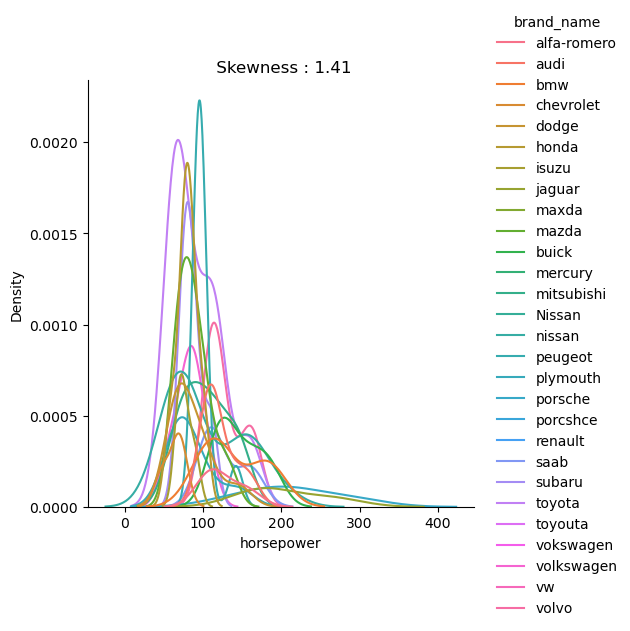

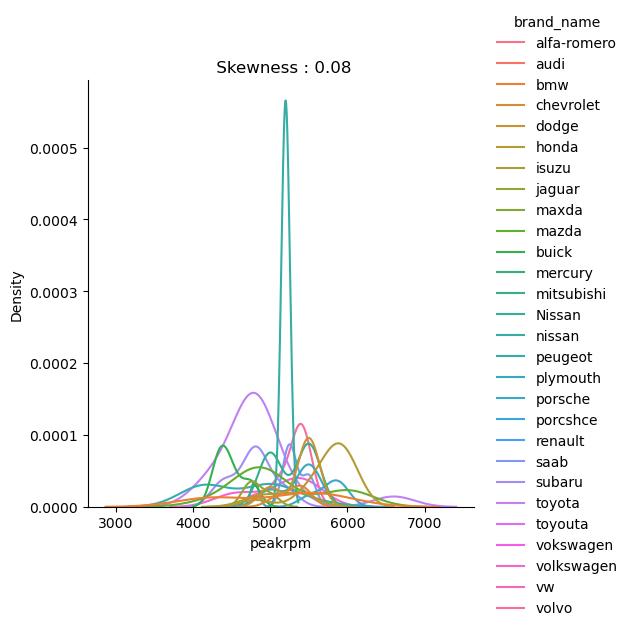

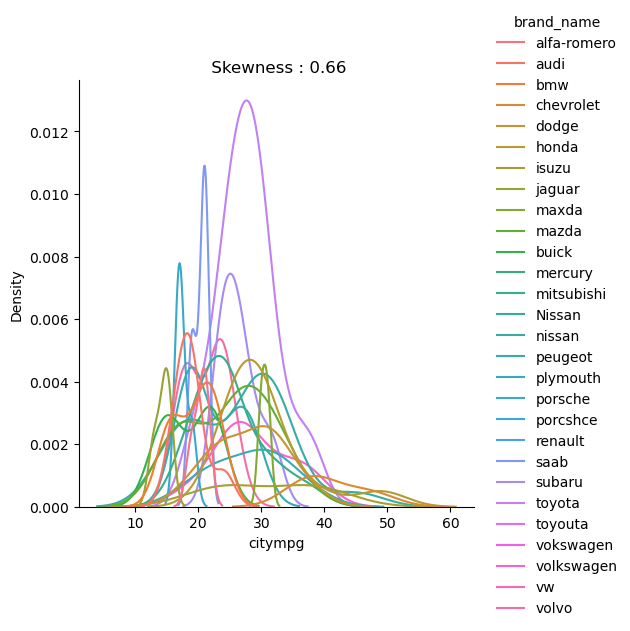

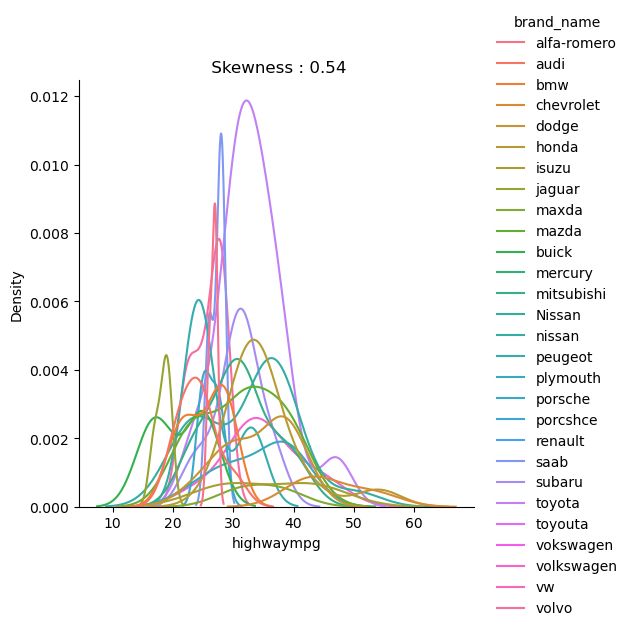

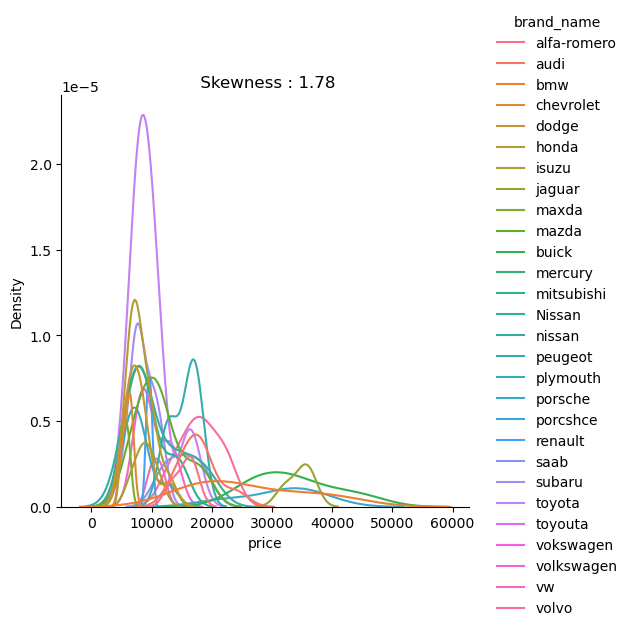

In [37]:
for i in num_cols:
    sns.displot(data=car_data, x=i, kind='kde', hue='brand_name')
    plt.title(f' Skewness : {round(car_data[i].skew(),2)}')
    plt.show()

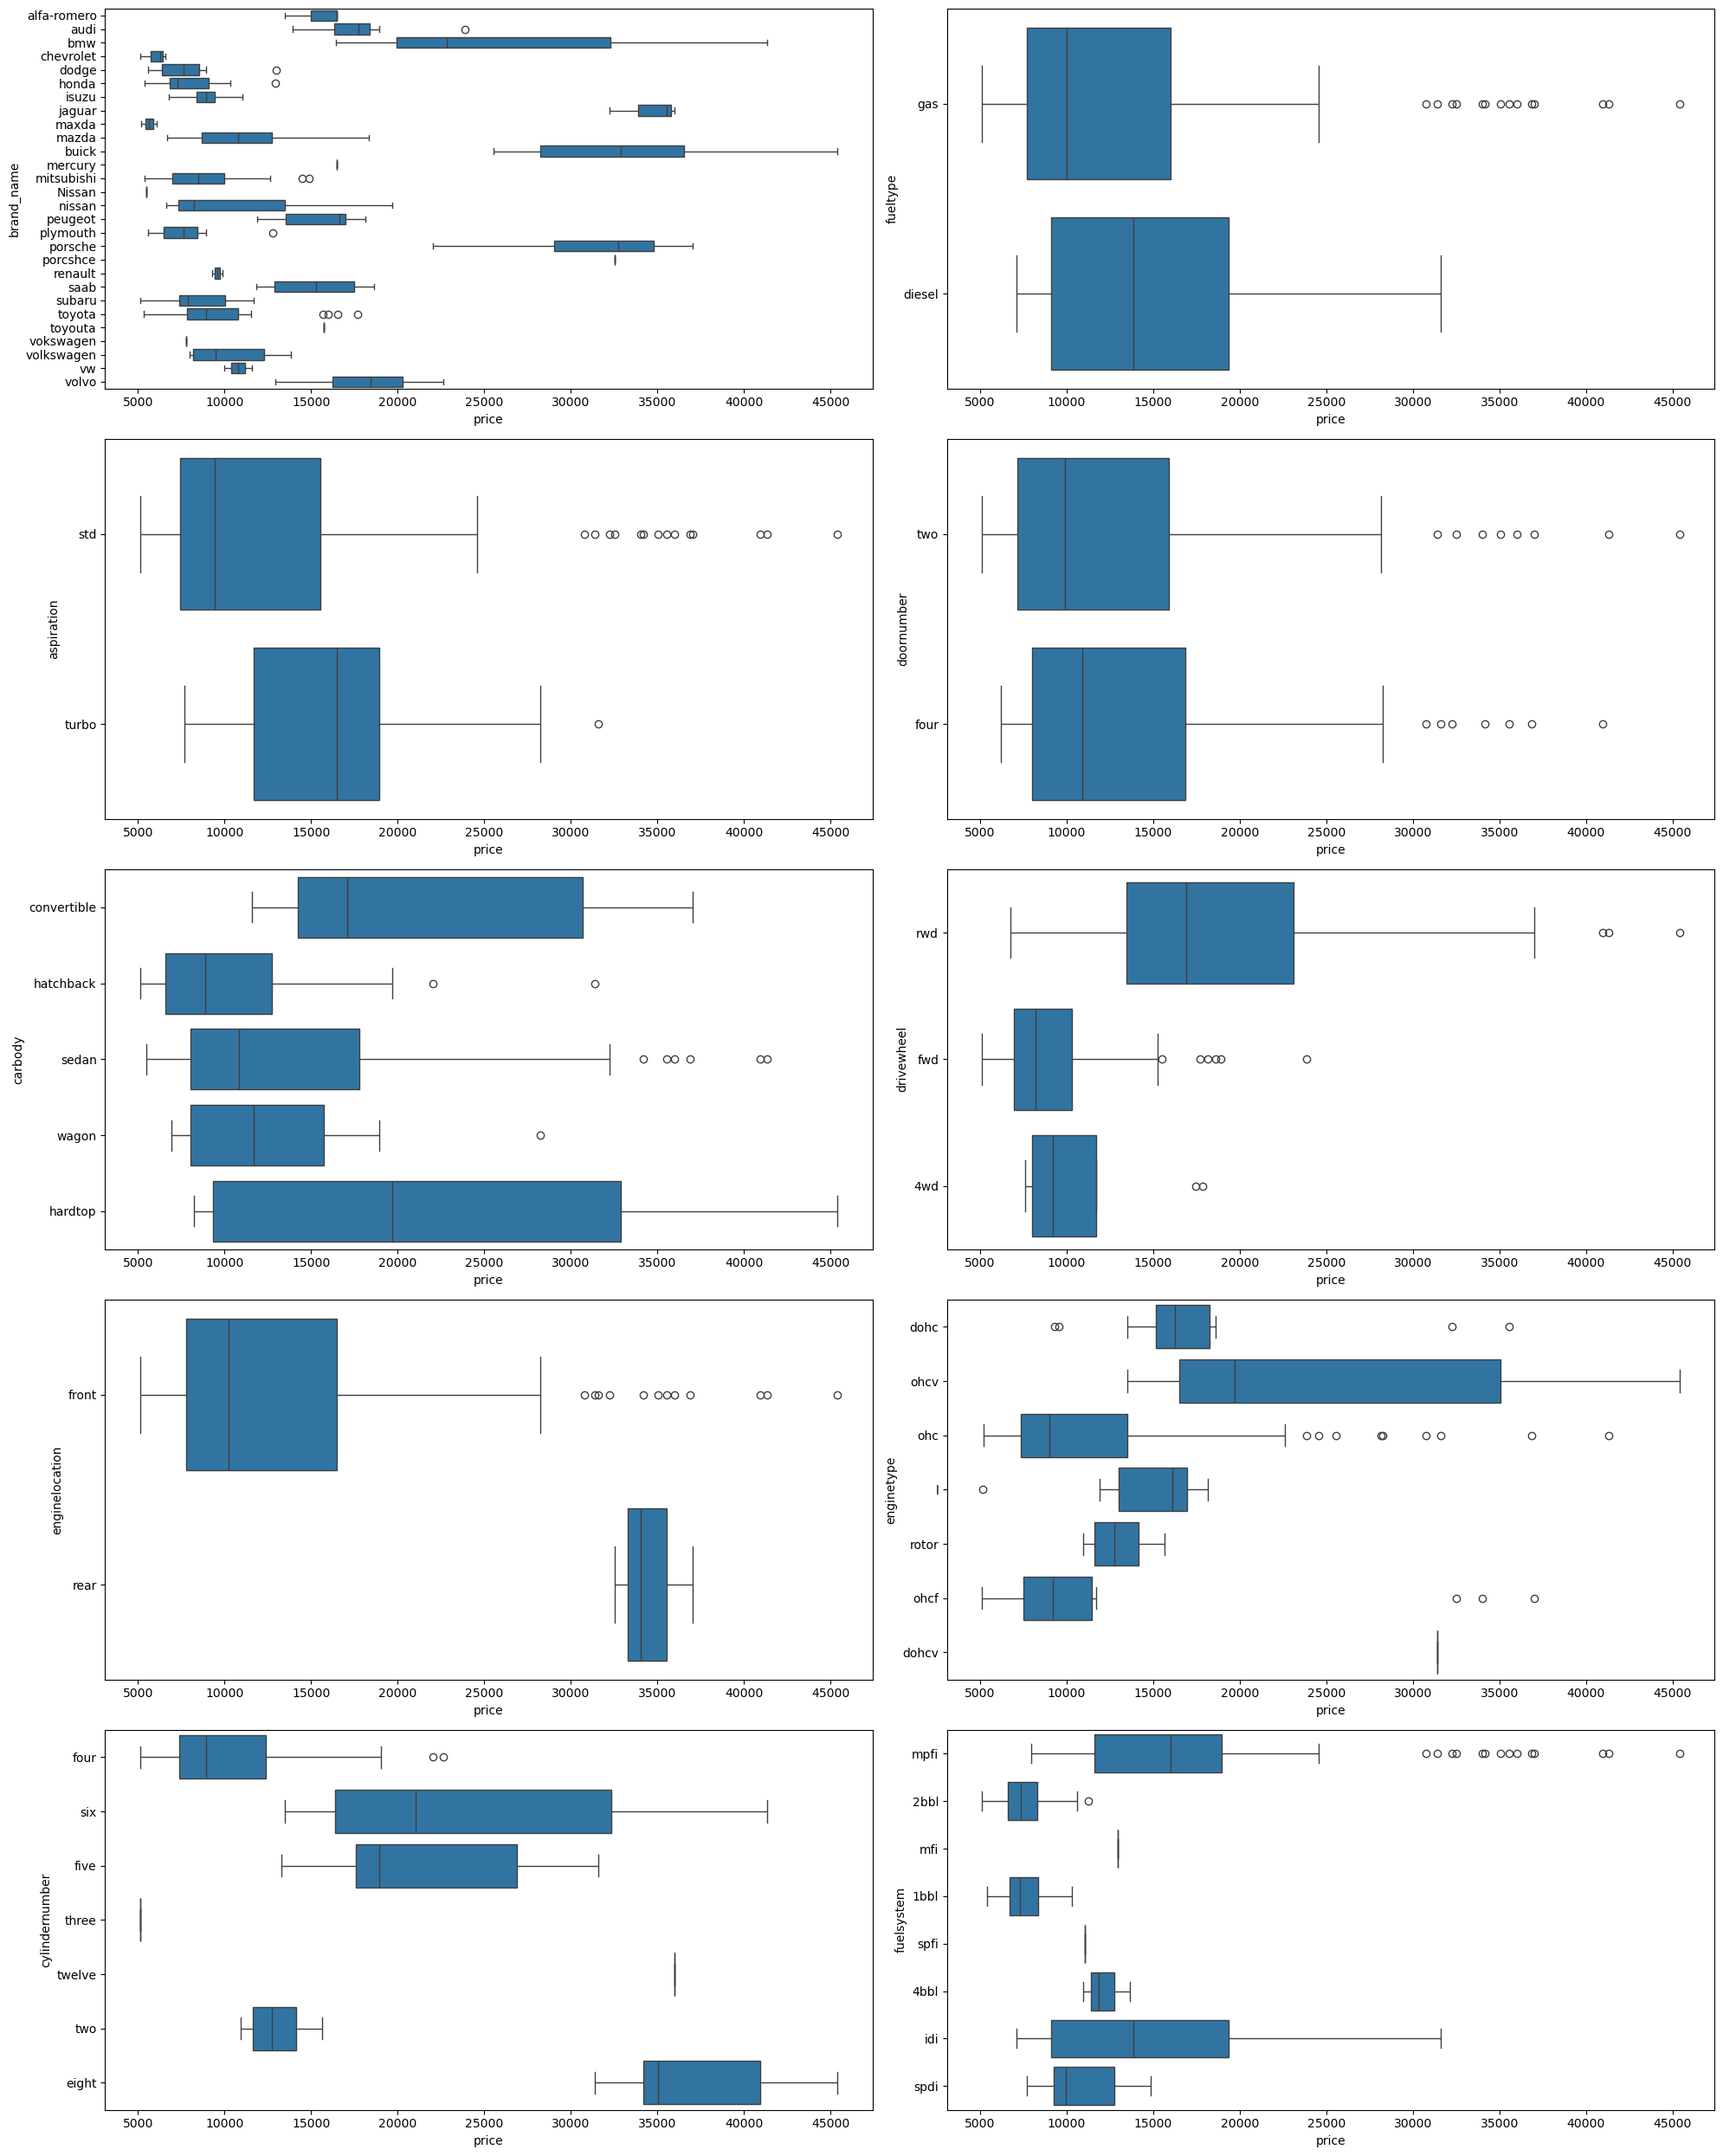

In [38]:
# price with other categorical columns

t=1
plt.figure(figsize=[20,25])
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.boxplot(data = car_data, x='price', y=i)
    t=t+1
plt.tight_layout()
plt.show()

Inference :

* In scatterplot, except symboling column all columns have some extreme values
* In displot, all the plots are overlapped
* In boxplot, we can see extreme outliers in fueltype, aspiration, doornumber, some segments of carbody and some of drivewheel, enginelocation, enginetype and fuelsystem

## Inferential Statistics

In [41]:
# To test which fueltype is actually more costly

samp1 = car_data[car_data['fueltype']=='diesel']['price']
samp2 = car_data[car_data['fueltype']=='gas']['price']

In [42]:
# Assumption 1 : Normality

# Ho : data is normal
# Ha : data is not normal

print(stats.shapiro(car_data['price']))

ShapiroResult(statistic=0.8006648595947646, pvalue=1.8490930057446264e-15)


Because assumption 1 is failed so didn't checked for assumption 2 and directly performing non-parametric test

In [44]:
# mu1 = average price of diesel fueltype
# mu2 = average price of gas fueltype

# Ho : mu1>=mu2
# Ha : mu1<mu2

t_stat, p_value = stats.mannwhitneyu(samp1, samp2, alternative= 'less')
print (t_stat, p_value)

if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

2353.0 0.9771323321944474
fail to reject Ho


Inference : Hence, we say that diesel fuel type has more price than gas fuel type which can be visualized as well from above visualization

## Data Preprocessing

### Check for the defects

In [48]:
# Null values

car_data.isnull().sum().sum()

0

In [49]:
# Duplicate rows

car_data[car_data.duplicated()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_name
car_ID,,,,,,,,,,,,,,,,,,,,,


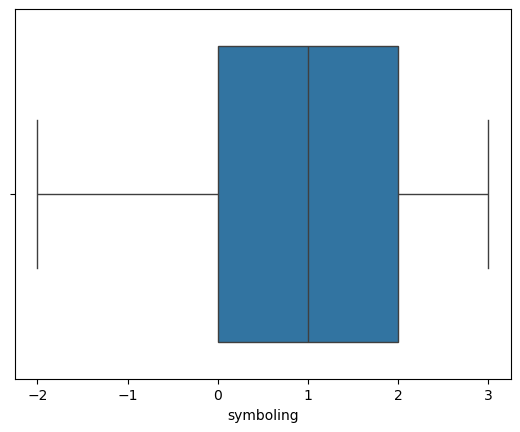

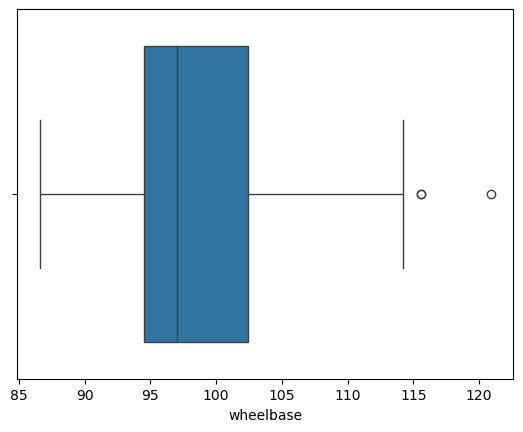

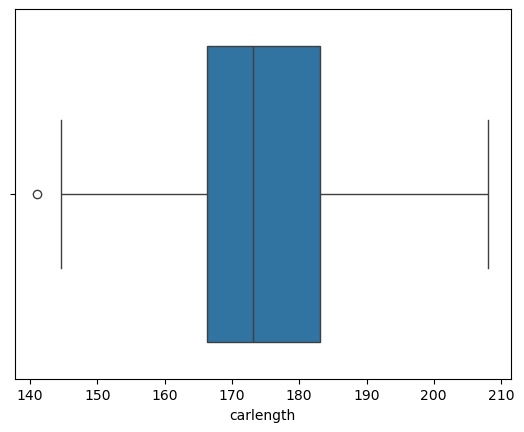

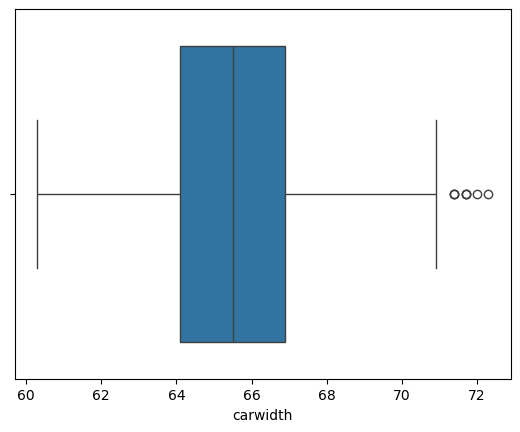

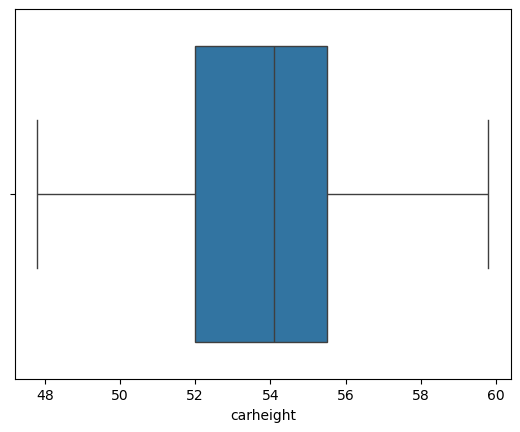

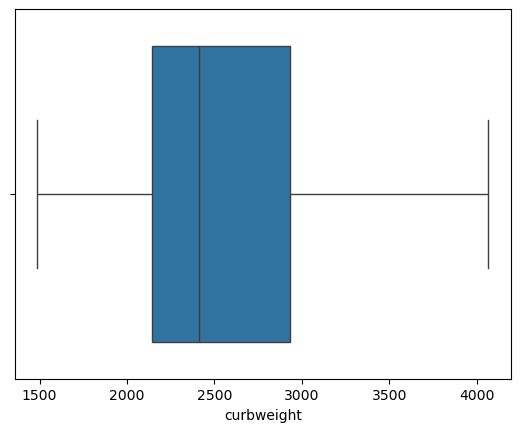

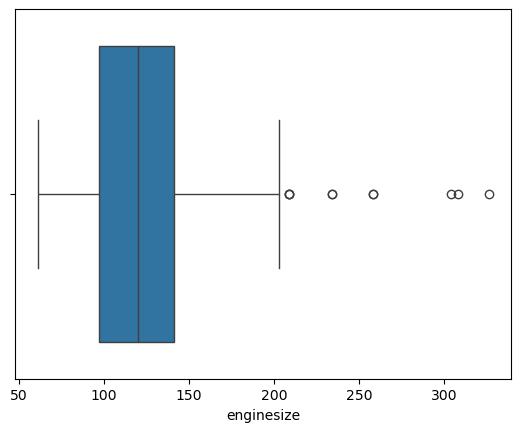

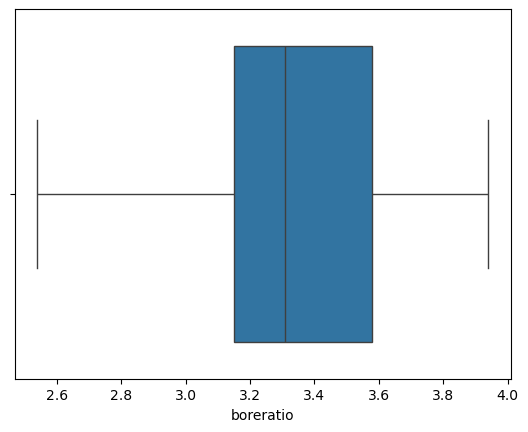

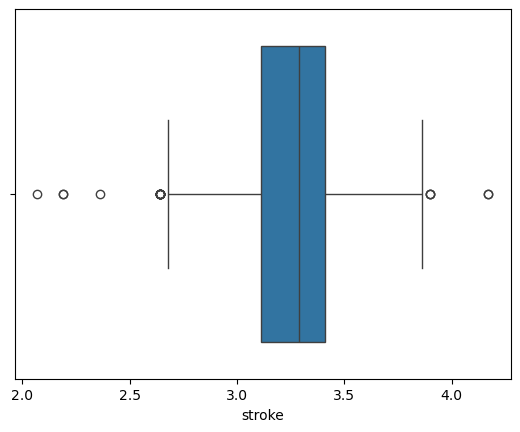

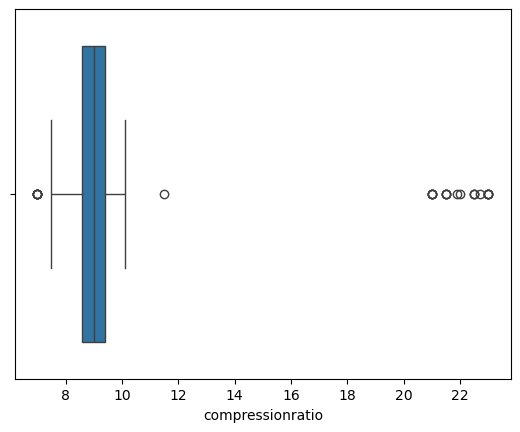

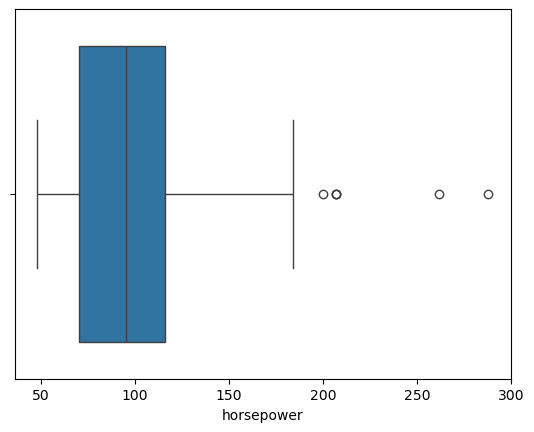

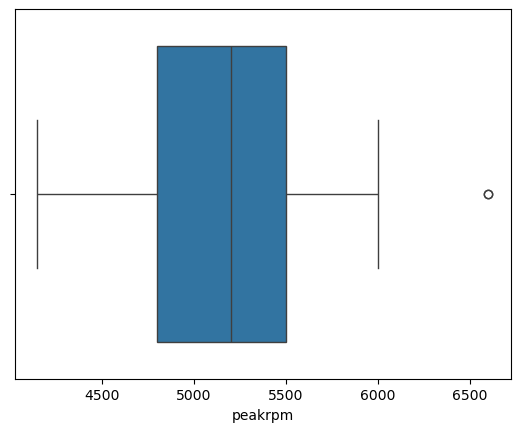

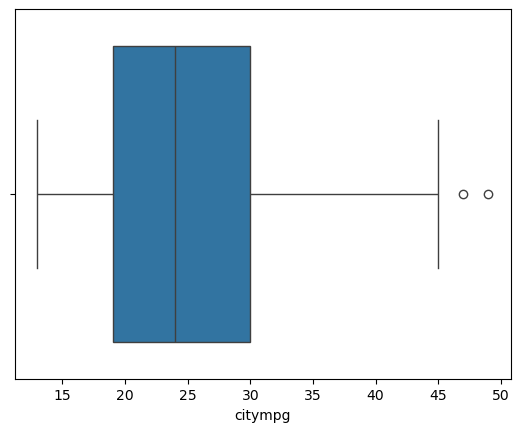

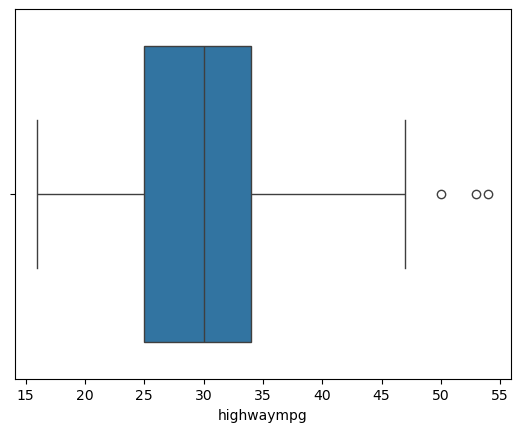

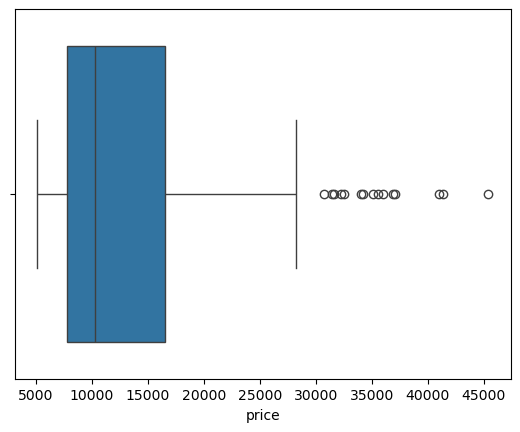

In [50]:
# Checking outliers

for i in num_cols:
    sns.boxplot(data=car_data, x=i)
    plt.show()

In [51]:
# Capping the outliers

for i in num_cols:
    q3,q1 = np.percentile(car_data[i], [75,25])
    iqr = q3-q1
    ul,ll = q3+1.5*iqr, q1-1.5*iqr
    car_data[i] = car_data[i].apply(lambda x : ul if x>ul else ll if x<ll else x)

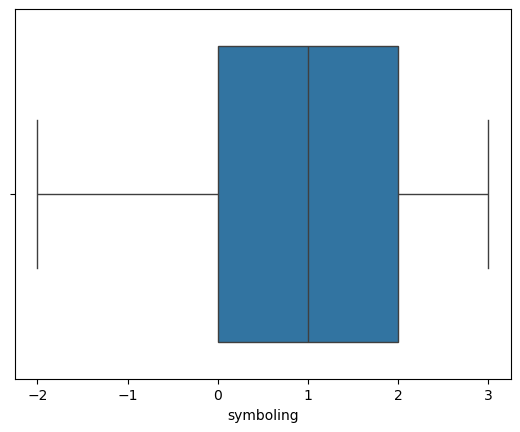

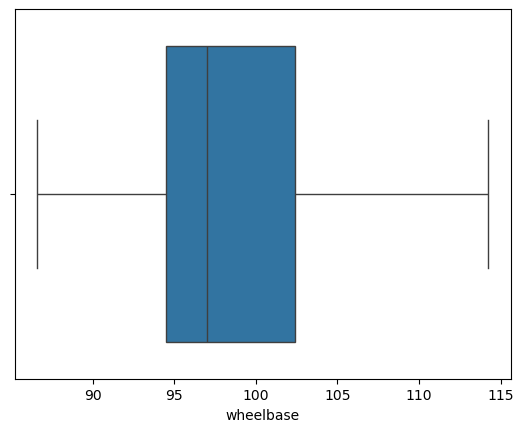

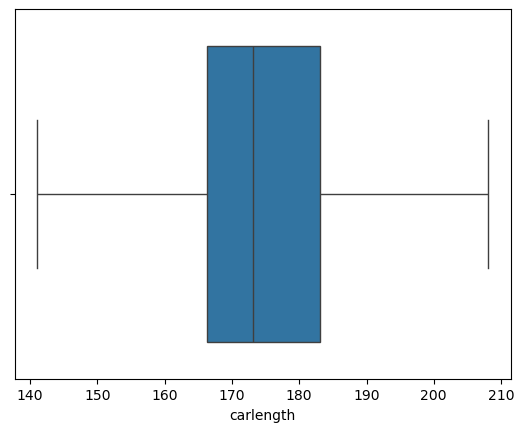

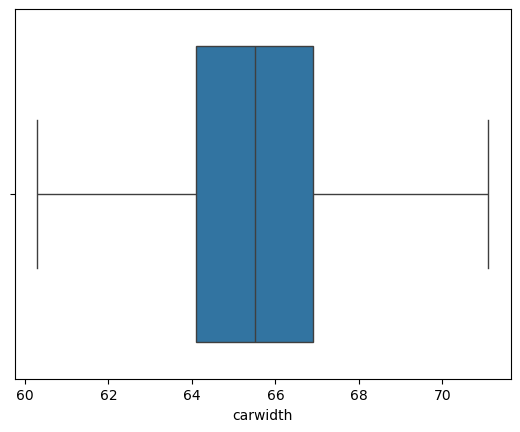

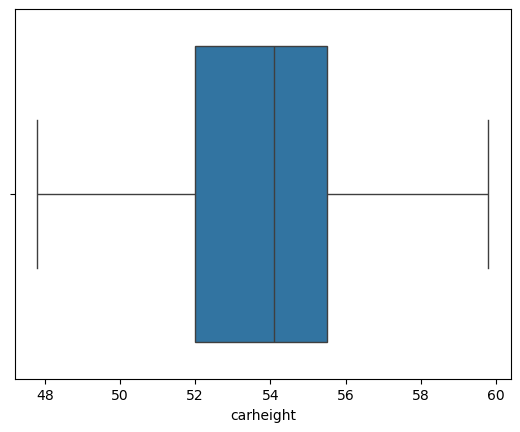

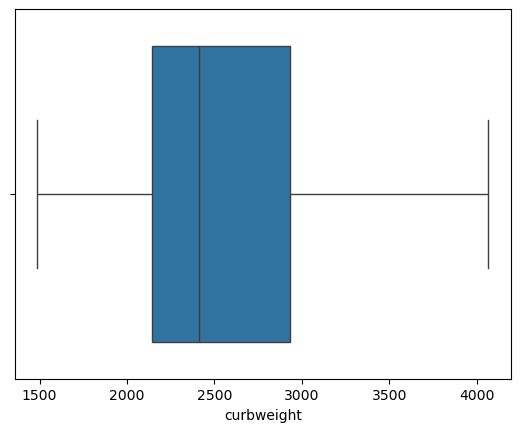

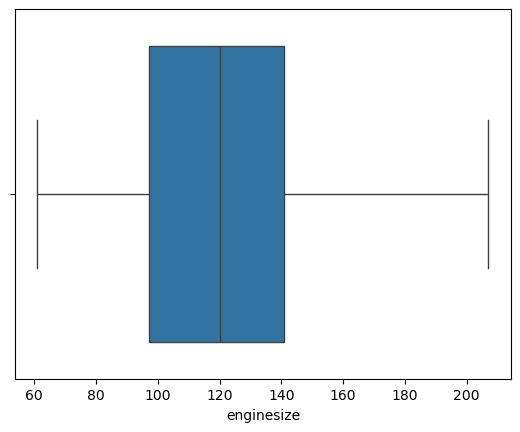

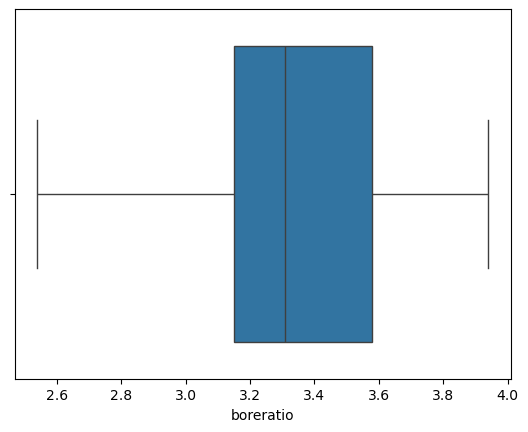

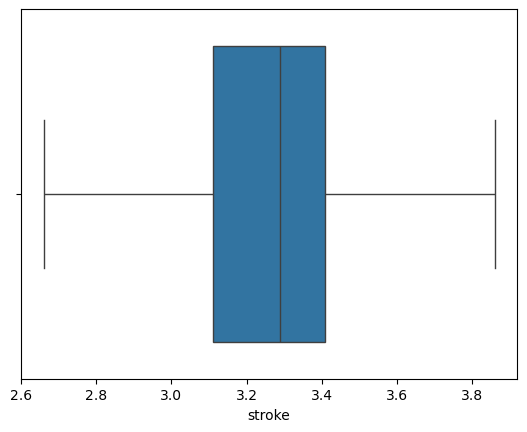

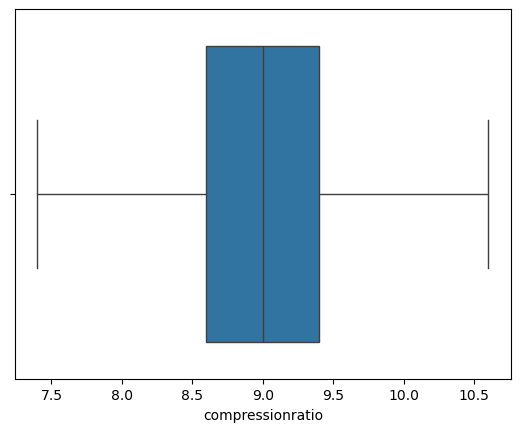

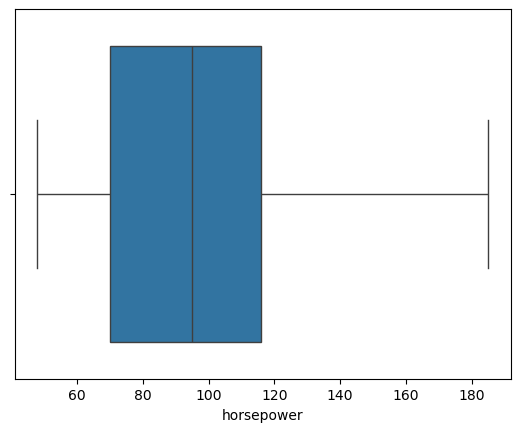

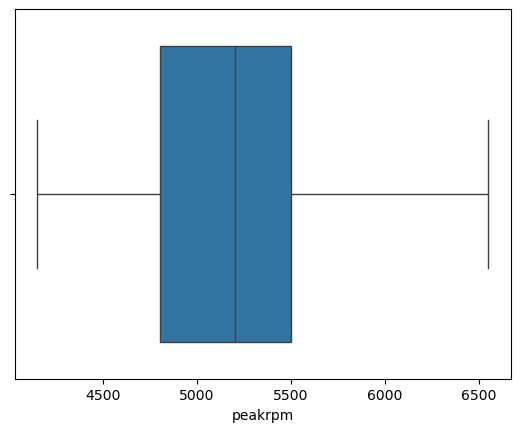

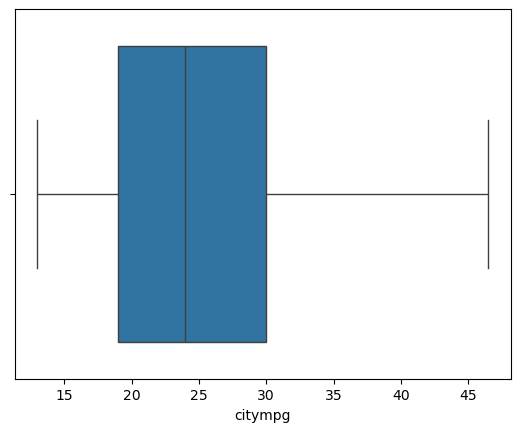

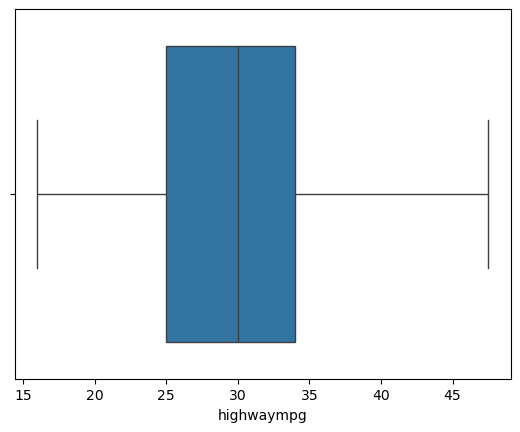

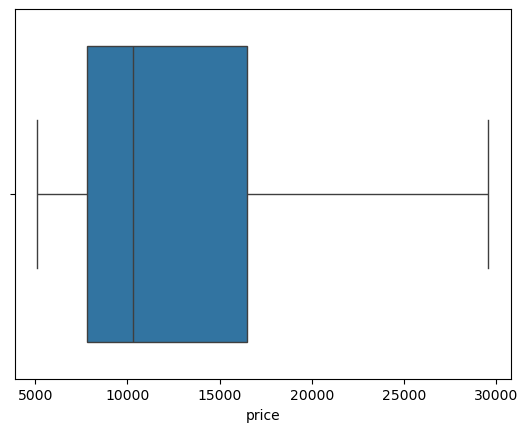

In [52]:
# Rechecking the outliers

for i in num_cols:
    sns.boxplot(data=car_data, x=i)
    plt.show()

In [53]:
car_data.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_name
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,alfa-romero


## Feature Engineering

In [55]:
car_data.set_index(['brand_name'], inplace=True)

In [56]:
car_data.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
brand_name,,,,,,,,,,,,,,,,,,,,,
alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0


## Encoding

In [58]:
map_fueltype = car_data['fueltype'].value_counts(normalize=True).to_dict()

In [59]:
car_data['fueltype'] = car_data['fueltype'].map(map_fueltype)

In [60]:
map_aspiration = car_data['aspiration'].value_counts(normalize=True).to_dict()

In [61]:
car_data['aspiration'] = car_data['aspiration'].map(map_aspiration)

In [62]:
map_carbody = car_data['carbody'].value_counts(normalize=True).to_dict()

In [63]:
car_data['carbody'] = car_data['carbody'].map(map_carbody)

In [64]:
map_drivewheel = car_data['drivewheel'].value_counts(normalize=True).to_dict()

In [65]:
car_data['drivewheel'] = car_data['drivewheel'].map(map_drivewheel)

In [66]:
map_enginelocation = car_data['enginelocation'].value_counts(normalize=True).to_dict()

In [67]:
car_data['enginelocation'] = car_data['enginelocation'].map(map_enginelocation)

In [68]:
map_enginetype = car_data['enginetype'].value_counts(normalize=True).to_dict()

In [69]:
car_data['enginetype'] = car_data['enginetype'].map(map_enginetype)

In [70]:
map_cylindernumber = car_data['cylindernumber'].value_counts(normalize=True).to_dict()

In [71]:
car_data['cylindernumber'] = car_data['cylindernumber'].map(map_cylindernumber)

In [72]:
map_fuelsystem = car_data['fuelsystem'].value_counts(normalize=True).to_dict()

In [73]:
car_data['fuelsystem'] = car_data['fuelsystem'].map(map_fuelsystem)

In [74]:
le = LabelEncoder()

In [75]:
car_data['doornumber'] = le.fit_transform(car_data['doornumber'])

In [76]:
car_data.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
brand_name,,,,,,,,,,,,,,,,,,,,,
alfa-romero,3,0.902439,0.819512,1,0.029268,0.370732,0.985366,88.6,168.8,64.1,...,130.0,0.458537,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
alfa-romero,3,0.902439,0.819512,1,0.029268,0.370732,0.985366,88.6,168.8,64.1,...,130.0,0.458537,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0


## Train Test Split

In [78]:
x = car_data.drop(columns=['price'])
y = car_data['price']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=2)

In [80]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 23) (62, 23) (143,) (62,)


## Predictive Modelling

In [82]:
mod = []
r_squared = []
mse = []
rmse = []
mae = []
mape = []

def model_validation(model, xtrain, ytrain, xtest, ytest):
    global scorecard
    m = model
    m.fit(xtrain, ytrain)
    y_pred = m.predict(x_test)
    
    print('R-Squared : ', r2_score(ytest, y_pred))
    print('Mean squared error : ', mean_squared_error(ytest, y_pred))
    print('Root mean squared error : ', mean_squared_error(ytest, y_pred)**0.5)
    print('Mean absolute error : ', mean_absolute_error(ytest, y_pred))
    print('Mean absolute percentage error : ', mean_absolute_percentage_error(ytest, y_pred))
    
    residuals = ytest - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f'Residuals Plot')
    plt.show()
    
    ans = input('Do you want to save the result? Y/N')
    if ans.lower()=='y':
        mod.append(str(model))
        r_squared.append(r2_score(ytest, y_pred))
        mse.append(mean_squared_error(ytest, y_pred))
        rmse.append(mean_squared_error(ytest, y_pred)**0.5)
        mae.append(mean_absolute_error(ytest, y_pred))
        mape.append(mean_absolute_percentage_error(ytest, y_pred))
        scorecard = pd.DataFrame({'Model':mod, 'R-squared':r_squared, 'MSE':mse, 'RMSE':rmse, 'MAE':mae, 'MAPE':mape})
    else:
        return

In [83]:
def tuning_parameters(grid, estimator, x, y, score='r2'):
    gscv = GridSearchCV(estimator=estimator, param_grid=grid, verbose=1, scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_

## Linear Regression

R-Squared :  0.8332115027570601
Mean squared error :  6246876.309281679
Root mean squared error :  2499.3751837772734
Mean absolute error :  1966.574033336355
Mean absolute percentage error :  0.15427697277687452


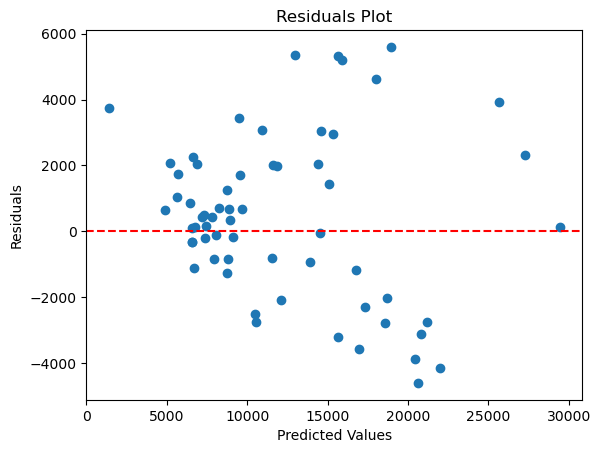

Do you want to save the result? Y/N Y


In [85]:
model_validation(LinearRegression(), x_train, y_train, x_test, y_test)

In [86]:
scorecard

,Model,R-squared,MSE,RMSE,MAE,MAPE
0,LinearRegression(),0.833212,6.246876e+06,2499.375184,1966.574033,0.154277


## KNN Regressor

In [88]:
x_train_s = x_train.copy()
x_test_s = x_test.copy()

In [89]:
standard = StandardScaler()

In [90]:
x_train_s[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']] = standard.fit_transform(x_train_s[[
    'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']])

In [91]:
x_test_s[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']] = standard.fit_transform(x_test_s[[
    'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']])

In [92]:
model_validation(KNeighborsRegressor(n_neighbors=5), x_train, y_train, x_test, y_test)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
scorecard

## Decision Tree

R-Squared :  0.82613985755713
Mean squared error :  6511736.857804661
Root mean squared error :  2551.81050585749
Mean absolute error :  1717.7231129032257
Mean absolute percentage error :  0.14321149231915037


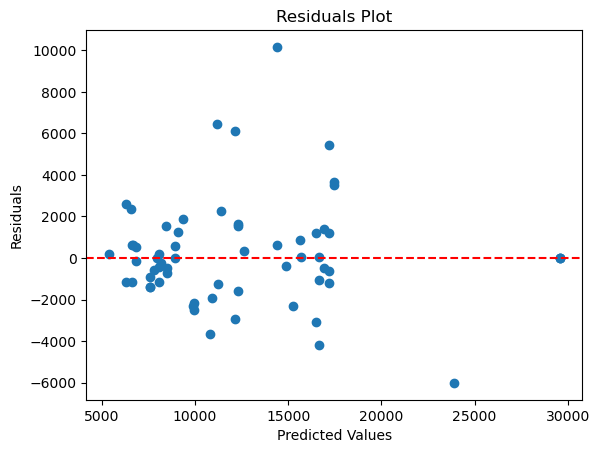

Do you want to save the result? Y/N Y


In [93]:
model_validation(DecisionTreeRegressor(), x_train, y_train, x_test, y_test)

In [95]:
scorecard

,Model,R-squared,MSE,RMSE,MAE,MAPE
0,LinearRegression(),0.833212,6.246876e+06,2499.375184,1966.574033,0.154277
1,DecisionTreeRegressor(),0.826140,6.511737e+06,2551.810506,1717.723113,0.143211


## Random Forest

R-Squared :  0.8280429202440869
Mean squared error :  6440459.776886352
Root mean squared error :  2537.806095210261
Mean absolute error :  1642.1341948924733
Mean absolute percentage error :  0.12161743534232244


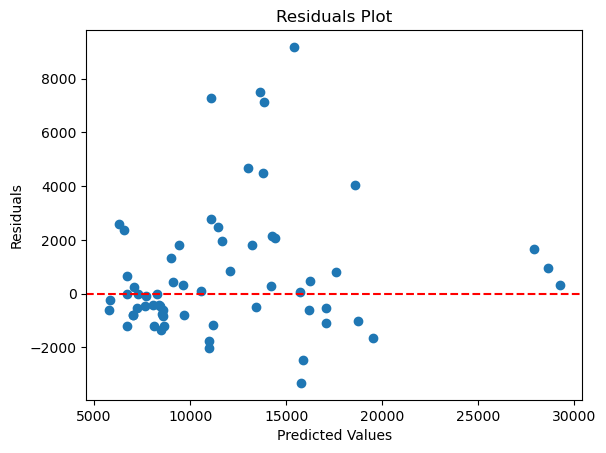

Do you want to save the result? Y/N Y


In [97]:
model_validation(RandomForestRegressor(n_estimators=100), x_train, y_train, x_test, y_test)

In [99]:
scorecard

,Model,R-squared,MSE,RMSE,MAE,MAPE
0,LinearRegression(),0.833212,6.246876e+06,2499.375184,1966.574033,0.154277
1,DecisionTreeRegressor(),0.826140,6.511737e+06,2551.810506,1717.723113,0.143211
2,RandomForestRegressor(),0.828043,6.440460e+06,2537.806095,1642.134195,0.121617


## Ada Boost

R-Squared :  0.8374233481015821
Mean squared error :  6089126.360478383
Root mean squared error :  2467.6155212022763
Mean absolute error :  1670.0115980302703
Mean absolute percentage error :  0.12985159066149057


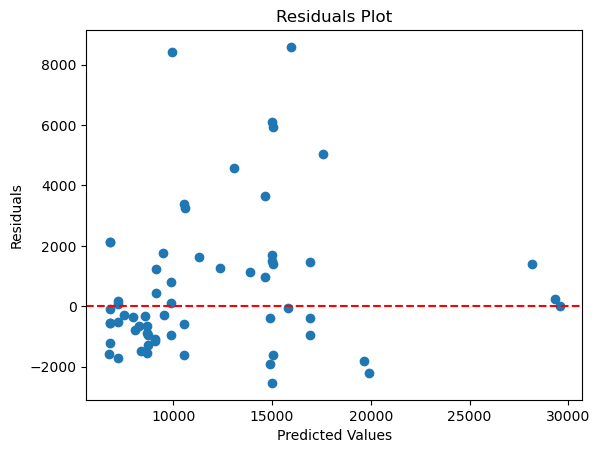

Do you want to save the result? Y/N Y


In [101]:
model_validation(AdaBoostRegressor(n_estimators=50), x_train, y_train, x_test, y_test)

In [103]:
scorecard

,Model,R-squared,MSE,RMSE,MAE,MAPE
0,LinearRegression(),0.833212,6.246876e+06,2499.375184,1966.574033,0.154277
1,DecisionTreeRegressor(),0.826140,6.511737e+06,2551.810506,1717.723113,0.143211
2,RandomForestRegressor(),0.828043,6.440460e+06,2537.806095,1642.134195,0.121617
3,AdaBoostRegressor(),0.837423,6.089126e+06,2467.615521,1670.011598,0.129852


## Gradient Boost

R-Squared :  0.8472938019371699
Mean squared error :  5719439.570042352
Root mean squared error :  2391.5349819817297
Mean absolute error :  1499.9023841771934
Mean absolute percentage error :  0.11243280804739762


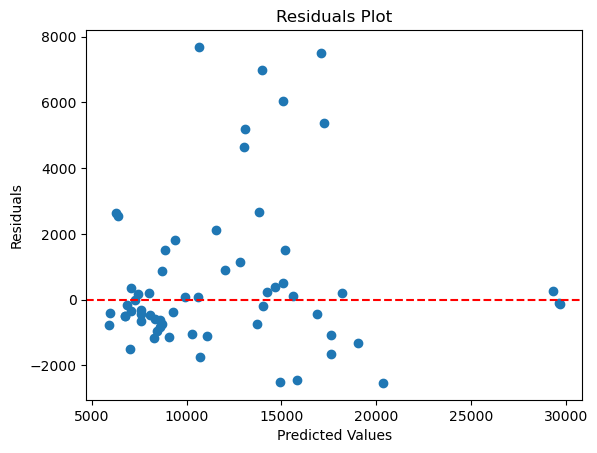

Do you want to save the result? Y/N Y


In [105]:
model_validation(GradientBoostingRegressor(n_estimators=100), x_train, y_train, x_test, y_test)

In [107]:
scorecard

,Model,R-squared,MSE,RMSE,MAE,MAPE
0,LinearRegression(),0.833212,6.246876e+06,2499.375184,1966.574033,0.154277
1,DecisionTreeRegressor(),0.826140,6.511737e+06,2551.810506,1717.723113,0.143211
2,RandomForestRegressor(),0.828043,6.440460e+06,2537.806095,1642.134195,0.121617
3,AdaBoostRegressor(),0.837423,6.089126e+06,2467.615521,1670.011598,0.129852
4,GradientBoostingRegressor(),0.847294,5.719440e+06,2391.534982,1499.902384,0.112433


## XG Boost

R-Squared :  0.828416856779452
Mean squared error :  6426454.402879386
Root mean squared error :  2535.04524671245
Mean absolute error :  1556.5450635080645
Mean absolute percentage error :  0.11611933505601917


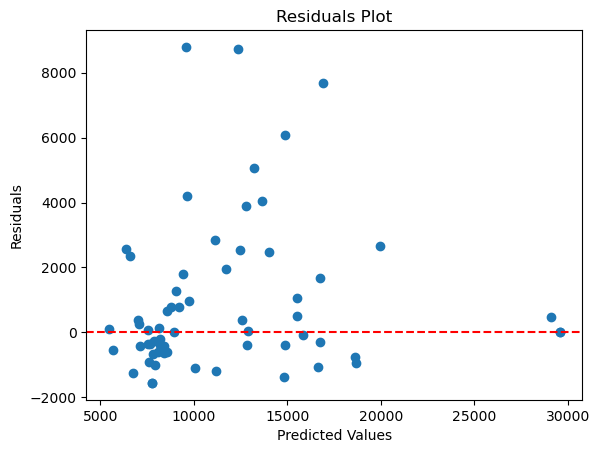

Do you want to save the result? Y/N Y


In [109]:
model_validation(XGBRegressor(), x_train, y_train, x_test, y_test)

In [111]:
scorecard

,Model,R-squared,MSE,RMSE,MAE,MAPE
0,LinearRegression(),0.833212,6.246876e+06,2499.375184,1966.574033,0.154277
1,DecisionTreeRegressor(),0.826140,6.511737e+06,2551.810506,1717.723113,0.143211
2,RandomForestRegressor(),0.828043,6.440460e+06,2537.806095,1642.134195,0.121617
3,AdaBoostRegressor(),0.837423,6.089126e+06,2467.615521,1670.011598,0.129852
4,GradientBoostingRegressor(),0.847294,5.719440e+06,2391.534982,1499.902384,0.112433
5,"XGBRegressor(base_score=None, booster=None, ca...",0.828417,6.426454e+06,2535.045247,1556.545064,0.116119


## Final Model

In [113]:
grid = {'n_estimators' : [80,100,120], 'learning_rate' : [0.1,0.5,1], 'max_depth' : [3,5,7]}

In [115]:
final_gbm = tuning_parameters(grid=grid, estimator=GradientBoostingRegressor(), x=x_train, y=y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [117]:
final_gbm

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80}

R-Squared :  0.8452054469582909
Mean squared error :  5797656.566169649
Root mean squared error :  2407.8323376368317
Mean absolute error :  1516.7358376788297
Mean absolute percentage error :  0.11418473077608447


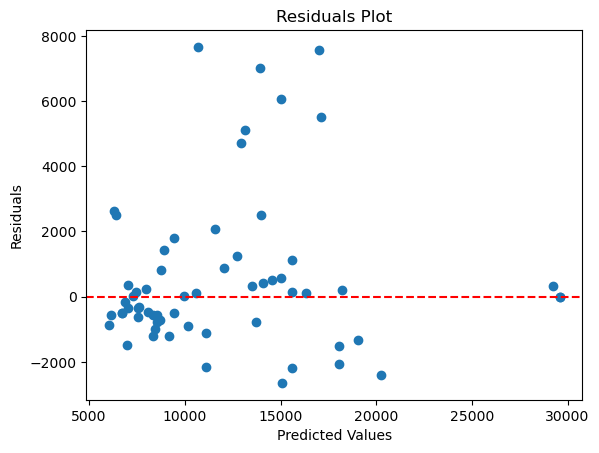

Do you want to save the result? Y/N Y


In [119]:
model_validation(GradientBoostingRegressor(**final_gbm), x_train, y_train, x_test, y_test)

**After fine tuning the Gradient Boost, it is being used as a final model**

In [121]:
final_model = GradientBoostingRegressor(**final_gbm)

In [123]:
final_model.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=80)

In [125]:
final_model.score(x_test, y_test)

0.8446869884287181

R-Squared :  0.842746258117752
Mean squared error :  5889762.729136252
Root mean squared error :  2426.883336531909
Mean absolute error :  1525.6765217452948
Mean absolute percentage error :  0.11451440045275306


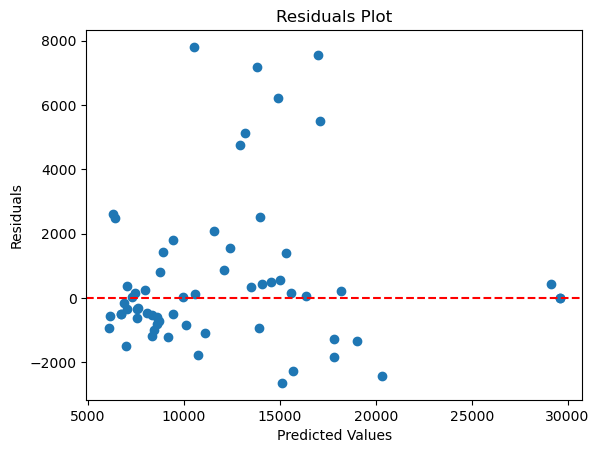

Do you want to save the result? Y/N Y


In [127]:
model_validation(final_model, x_train, y_train, x_test, y_test)

In [129]:
scorecard

,Model,R-squared,MSE,RMSE,MAE,MAPE
0,LinearRegression(),0.833212,6.246876e+06,2499.375184,1966.574033,0.154277
1,DecisionTreeRegressor(),0.826140,6.511737e+06,2551.810506,1717.723113,0.143211
2,RandomForestRegressor(),0.828043,6.440460e+06,2537.806095,1642.134195,0.121617
3,AdaBoostRegressor(),0.837423,6.089126e+06,2467.615521,1670.011598,0.129852
4,GradientBoostingRegressor(),0.847294,5.719440e+06,2391.534982,1499.902384,0.112433
5,"XGBRegressor(base_score=None, booster=None, ca...",0.828417,6.426454e+06,2535.045247,1556.545064,0.116119
6,GradientBoostingRegressor(n_estimators=80),0.845205,5.797657e+06,2407.832338,1516.735838,0.114185
7,GradientBoostingRegressor(n_estimators=80),0.842746,5.889763e+06,2426.883337,1525.676522,0.114514


## Business Interpretation

In [131]:
fi = final_model.feature_importances_

In [133]:
fi_data = pd.DataFrame({'Feature Importance' : fi}, index=x_train.columns).sort_values(by='Feature Importance', ascending=True)

In [135]:
fi_data

,Feature Importance
enginelocation,0.000000
enginetype,0.000078
drivewheel,0.000088
symboling,0.000097
doornumber,0.000104
fueltype,0.000233
aspiration,0.000265
compressionratio,0.000389
stroke,0.000574
carbody,0.002095


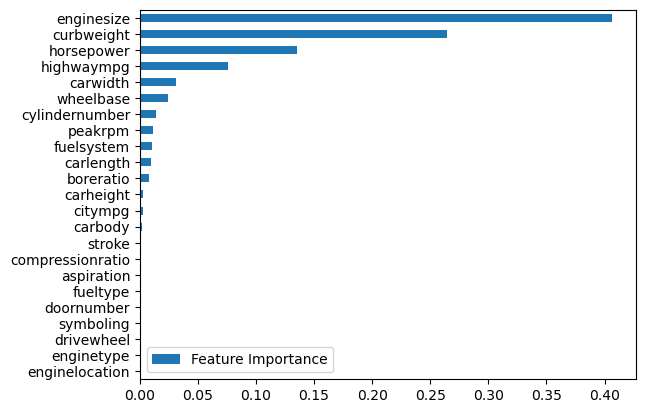

In [137]:
fi_data.plot(kind='barh')
plt.show()

**INFERENCE**

* All these columns are the important features in the data specially enginesize, curbweight, horsepower, highwaympg, carwidth, wheelbase, cylindernumber, peakrpm, fuelsystem, carlength and boreratio of the car

* And out of all these the most significant feature is enginesize which means the price of car is significantly dependent on its engine size 

* Second important feature is curbweight which means secondly the price of car depends on its weight without any luggage

* Although all these columns are telling about the predictions of car price with different brands, different engine size and different fuel system

## Deployment

**Save the final model as a pickle file**

In [141]:
with open('final_model_gbm.pkl', 'wb') as file:
    pickle.dump(final_model, file)